# Lending Club Case Study

**Version:** 1.0

---

**Document Information:**
- **Authors:** Irshad Shaikh and Ganesh Visweswaran
- **Creation Date:** May 8th, 2024
- **Last Update Date:** May 8th, 2024
- **Last Updated by:** [Update by Name/Initials]

---

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings as ws
#import plotly.express as px
ws.filterwarnings('ignore')

# Data Sourcing
Our data source appears to be private, as it is associated with a specific organization.

In [2]:
#----Loading the file into dataframe


loan_df=pd.read_csv('../Data_Source/loan.csv')
print ("Sample records: \n")
loan_df.head(2)

Sample records: 



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#----Identify the number of columns and rows in dataset


print("Loan Data - Row vs columns: ", loan_df.shape)

Loan Data - Row vs columns:  (39717, 111)


# Data Cleaning
## 1.1 Clean all rows which are null
#### Created two functions 
1. detinfo(df,list) : It gives data type, Number of Null Values, Number of Unique Values and detailed information about the column 


In [4]:
#function defined to provide detailed info on any column list when called for

def column_info(df, columns):
    """
    Print detailed information about specified columns in a DataFrame.

    Parameters:
    df : DataFrame
        The DataFrame containing the columns to analyze.
    columns : list
        List of column names for which information is needed.
    """

    for col in columns:
        print("*******************************************************")
        print("Column Name: ", col)
        print("-------------------------------------------------------")
        print("Type: ", df[col].dtype)
        print("Number of Null Values: ", df[col].isnull().sum())
        print("Number of Unique Values:", len(df[col].unique()))
        print("Detailed Information:")
        print(df[col].describe())

###  Identify the unnecessary columns

####  1 The columns which has 100% Null values and remove them

In [5]:
100*loan_df.isnull().mean()[loan_df.isnull().mean()==1]

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


In [6]:
empty_column=loan_df.isnull().mean()[100*loan_df.isnull().mean()==100].keys()
empty_column
loan_df_1=loan_df.drop(columns=empty_column)
loan_df_1.shape

(39717, 57)

In [7]:
100*loan_df_1.isnull().mean().sort_values(ascending=False)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
home_ownership                 0.000000
int_rate                       0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
term                           0.000000


#### 2 We still have some columns which have more than 90% Null values hence removing them

In [8]:
empty_column=loan_df_1.isnull().mean()[100*loan_df_1.isnull().mean()>90].keys()
empty_column
loan_df_1=loan_df_1.drop(columns=empty_column)
loan_df_1.shape

(39717, 55)

#### 3 Check for empty rows

In [9]:
# There are no empty rows when we execute this
100*loan_df_1.isnull().mean(axis=1).sort_values(ascending=False)

39715    10.909091
39714    10.909091
39660    10.909091
39659    10.909091
11282     9.090909
           ...    
25203     0.000000
2448      0.000000
25213     0.000000
25214     0.000000
23741     0.000000
Length: 39717, dtype: float64

#### 4 Remove duplicate records

In [10]:
#There are no duplicate records
loan_df_1.shape , loan_df_1.drop_duplicates().shape

((39717, 55), (39717, 55))

In [11]:
# Viewing data to check info:
column_info(loan_df_1,loan_df_1.columns)

*******************************************************
Column Name:  id
-------------------------------------------------------
Type:  int64
Number of Null Values:  0
Number of Unique Values: 39717
Detailed Information:
count    3.971700e+04
mean     6.831319e+05
std      2.106941e+05
min      5.473400e+04
25%      5.162210e+05
50%      6.656650e+05
75%      8.377550e+05
max      1.077501e+06
Name: id, dtype: float64
*******************************************************
Column Name:  member_id
-------------------------------------------------------
Type:  int64
Number of Null Values:  0
Number of Unique Values: 39717
Detailed Information:
count    3.971700e+04
mean     8.504636e+05
std      2.656783e+05
min      7.069900e+04
25%      6.667800e+05
50%      8.508120e+05
75%      1.047339e+06
max      1.314167e+06
Name: member_id, dtype: float64
*******************************************************
Column Name:  loan_amnt
-------------------------------------------------------
Type: 

Number of Null Values:  697
Number of Unique Values: 4
Detailed Information:
count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64
*******************************************************
Column Name:  tax_liens
-------------------------------------------------------
Type:  float64
Number of Null Values:  39
Number of Unique Values: 2
Detailed Information:
count    39678.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64


##### 5 Remove column wich doesn't have meaningfull data

In [12]:
# After executing above we got the info that,
# we have some columns which has 3 or less than 3 unique values 
# Checking for for the column which has less than  3 unique values
limi_val=list()
for x in loan_df_1.columns:
    if len(loan_df_1[x].unique())<4:
        limi_val.append(x)
print(limi_val)

['term', 'verification_status', 'loan_status', 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [13]:
# 
# Check for the values if they have any significance
for x in limi_val:
    print(x,'---->',loan_df_1[x].unique())

term ----> [' 36 months' ' 60 months']
verification_status ----> ['Verified' 'Source Verified' 'Not Verified']
loan_status ----> ['Fully Paid' 'Charged Off' 'Current']
pymnt_plan ----> ['n']
initial_list_status ----> ['f']
collections_12_mths_ex_med ----> [ 0. nan]
policy_code ----> [1]
application_type ----> ['INDIVIDUAL']
acc_now_delinq ----> [0]
chargeoff_within_12_mths ----> [ 0. nan]
delinq_amnt ----> [0]
tax_liens ----> [ 0. nan]


In [14]:
# We don't need people who have loan_status='Current'
loan_df_1=loan_df_1[loan_df_1['loan_status']!='Current']
# These columns does not have anything important hence removing them
col=['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type'
     ,'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']
loan_df_1=loan_df_1.drop(columns=col)
loan_df_1.shape

(38577, 46)

In [15]:
# checking random record to see if there are any columns which is not important for analysis
loan_df_1.iloc[1]

id                                                                   1077430
member_id                                                            1314167
loan_amnt                                                               2500
funded_amnt                                                             2500
funded_amnt_inv                                                       2500.0
term                                                               60 months
int_rate                                                              15.27%
installment                                                            59.83
grade                                                                      C
sub_grade                                                                 C4
emp_title                                                              Ryder
emp_length                                                          < 1 year
home_ownership                                                          RENT

In [16]:
# For now URL and DESC columns seems not so useful
loan_df_1=loan_df_1.drop(columns=['url','desc'])
loan_df_1.shape

(38577, 44)

##### 6 Remove special symbols in columns so that we can clean and segrigate data for analysis

In [17]:
loan_df_1['int_rate']=loan_df_1['int_rate'].apply(lambda x: x.replace('%',''))
loan_df_1['zip_code']=loan_df_1['zip_code'].apply(lambda x: x.replace('xx',''))
loan_df_1['sub_grade']=loan_df_1['sub_grade'].apply(lambda x: x[-1])
loan_df_1['revol_util']=loan_df_1['revol_util'].apply(lambda x: np.nan if pd.isna(x) else x.replace('%',''))


##### 7 Data type corrections

In [18]:
# Changing below columns to Numeric since it appear as string
loan_df_1['zip_code']=pd.to_numeric(loan_df_1['zip_code'])
loan_df_1['int_rate']=loan_df_1['int_rate'].str.strip().astype(float)
loan_df_1['revol_util']=loan_df_1['revol_util'].str.strip().astype(float)

In [19]:
# Changing string columns to date 

loan_df_1['issue_d'] = pd.to_datetime(loan_df_1['issue_d'], format='%b-%y')
loan_df_1['last_pymnt_d'] = pd.to_datetime(loan_df_1['last_pymnt_d'], format='%b-%y')
loan_df_1['last_credit_pull_d'] = pd.to_datetime(loan_df_1['last_credit_pull_d'], format='%b-%y')

In [20]:
#Identify numeric and string column
num_col=loan_df_1.dtypes[(loan_df_1.dtypes=='int64') | (loan_df_1.dtypes=='float64')]
str_col=loan_df_1.dtypes[~((loan_df_1.dtypes=='int64') | (loan_df_1.dtypes=='float64'))]
loan_df_1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [21]:
# I have checked for the value of each column and seggrigated them as below 
ordered_cat=['term','grade','sub_grade','emp_length','issue_d','delinq_2yrs'
             ,'earliest_cr_line','inq_last_6mths','mths_since_last_delinq',
             'last_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies']
unordered_cat=['home_ownership','verification_status','loan_status','purpose',
               'zip_code','addr_state']
other=['id','member_id','desc','emp_title','title']
measure_col=['loan_amnt', 'funded_amnt','funded_amnt_inv','int_rate',
             'installment','annual_inc','dti','open_acc','pub_rec','revol_bal'
             ,'revol_util','total_acc','out_prncp','total_pymnt'
             ,'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee'
             ,'recoveries','collection_recovery_fee','last_pymnt_amnt']

In [22]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
loan_df_1[measure_col].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,...,total_acc,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,...,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000
mean,11047.025,10784.059,10222.481,11.932,322.466,68777.974,13.273,9.275,0.055,13289.490,...,22.053,0.000,11866.970,11271.196,9648.323,2119.243,1.369,98.036,12.773,2746.243
std,7348.442,7090.306,7022.721,3.691,208.639,64218.682,6.673,4.402,0.238,15866.492,...,11.426,0.000,8809.856,8700.846,7009.381,2389.500,7.316,698.650,150.837,4494.648
min,500.000,500.000,0.000,5.420,15.690,4000.000,0.000,2.000,0.000,0.000,...,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5300.000,5200.000,5000.000,8.940,165.740,40000.000,8.130,6.000,0.000,3650.000,...,13.000,0.000,5513.497,5019.590,4500.000,643.990,0.000,0.000,0.000,217.420
50%,9600.000,9550.000,8733.440,11.710,277.860,58868.000,13.370,9.000,0.000,8762.000,...,20.000,0.000,9674.048,9066.660,8000.000,1300.450,0.000,0.000,0.000,568.260
75%,15000.000,15000.000,14000.000,14.380,425.550,82000.000,18.560,12.000,0.000,16912.000,...,29.000,0.000,16136.952,15329.780,13175.000,2671.980,0.000,0.000,0.000,3447.250
max,35000.000,35000.000,35000.000,24.400,1305.190,6000000.000,29.990,44.000,4.000,149588.000,...,90.000,0.000,58563.680,58563.680,35000.020,23563.680,180.200,29623.350,7002.190,36115.200



# Univariate Analysis




#### 1. Categorical variable Univariate Analysis

--------------Ordered Category term  -----------------


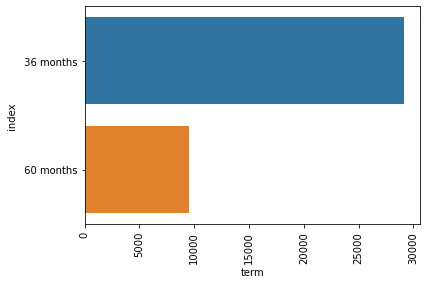

--------------Ordered Category grade  -----------------


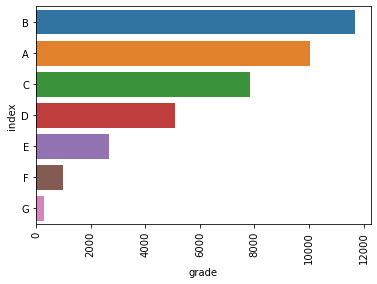

--------------Ordered Category sub_grade  -----------------


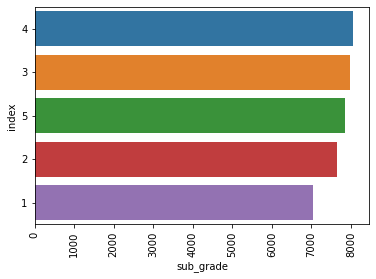

--------------Ordered Category emp_length  -----------------


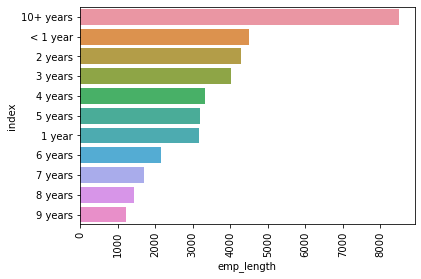

--------------Ordered Category issue_d  -----------------


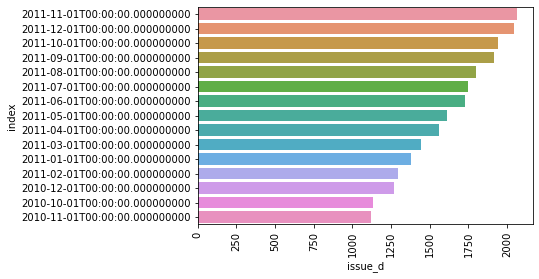

--------------Ordered Category delinq_2yrs  -----------------


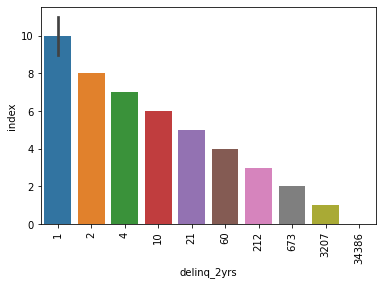

--------------Ordered Category earliest_cr_line  -----------------


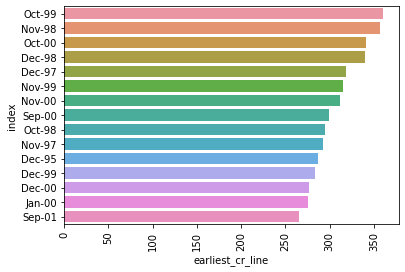

--------------Ordered Category inq_last_6mths  -----------------


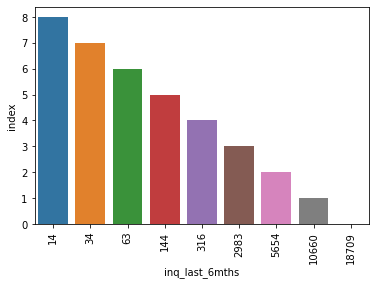

--------------Ordered Category mths_since_last_delinq  -----------------


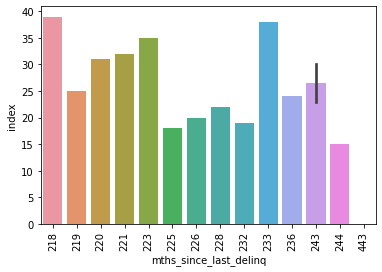

--------------Ordered Category last_pymnt_d  -----------------


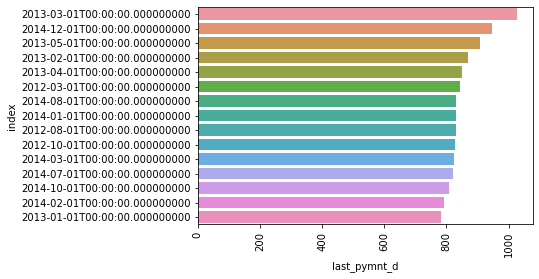

--------------Ordered Category last_credit_pull_d  -----------------


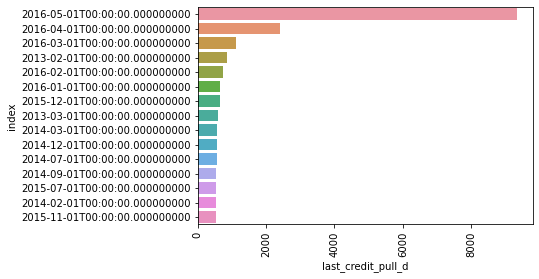

--------------Ordered Category pub_rec_bankruptcies  -----------------


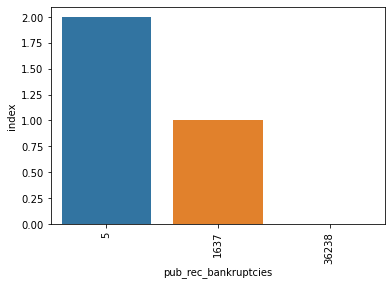

In [23]:
# Plotting cateogorical variable and trying to see the pattern if we find any
for z in ordered_cat:
    print("--------------Ordered Category",z," -----------------")
    dta=loan_df_1[z].value_counts().head(15).reset_index()
    sns.barplot(y='index',x=z,data=dta)
    plt.xticks(rotation=90)
    plt.show()

According to above barplot 
* More people prefer to have 36 month tenuer
* More poople fall into B, A and C category
* 10+ years people tend to apply more for loan than anyother category
* There were huge rise in loan application in 2011 sep, oct, nov and dec 

--------------unordered Category home_ownership  -----------------


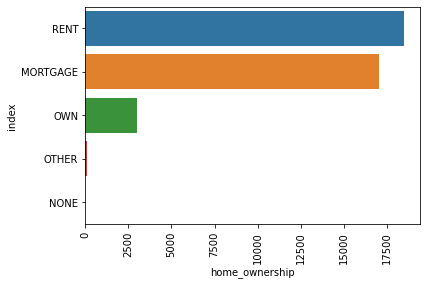

--------------unordered Category verification_status  -----------------


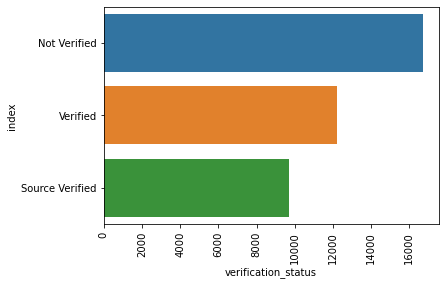

--------------unordered Category loan_status  -----------------


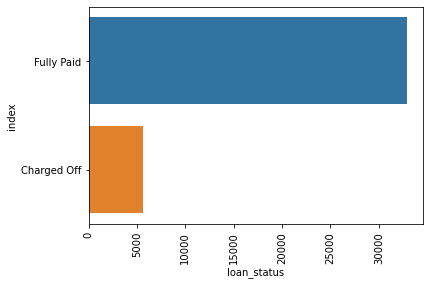

--------------unordered Category purpose  -----------------


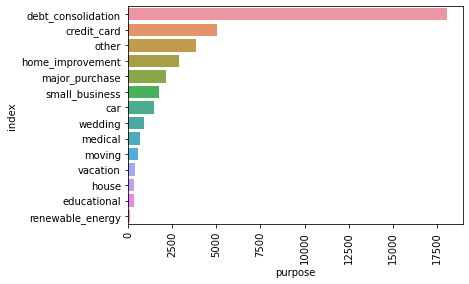

--------------unordered Category zip_code  -----------------


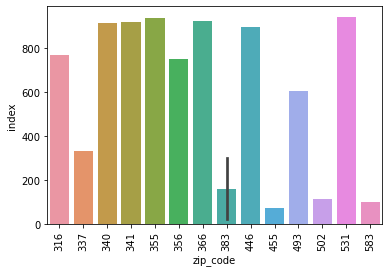

--------------unordered Category addr_state  -----------------


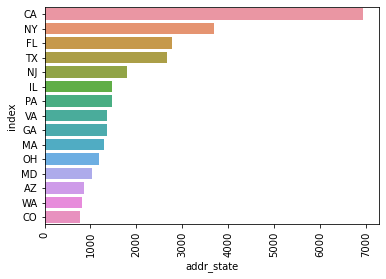

In [24]:
# Insights from unorder categorical variable
for z in unordered_cat:
    print("--------------unordered Category",z," -----------------")
    dta=loan_df_1[z].value_counts().head(15).reset_index()
    sns.barplot(y='index',x=z,data=dta)
    plt.xticks(rotation=90)
    plt.show()

According to above graphs:
 1. Home_owner who have MORTGAGE and RENT category tends to borrow as compare to any other category
 2. Not verified people are more in number who are getting loan approved this is serius alarm 
 3. People with debt_consolidation and credit_card tends to apply for loan more than any other purpose
 4. People who are from NY and CA tend to apply for loan more than any other state

In [25]:
loan_df_1['loan_status'].value_counts(normalize=True)*100

Fully Paid    85.414
Charged Off   14.586
Name: loan_status, dtype: float64

#### 2. Numeric variable univariate analysis

--------------Box Plot Category addr_state  -----------------



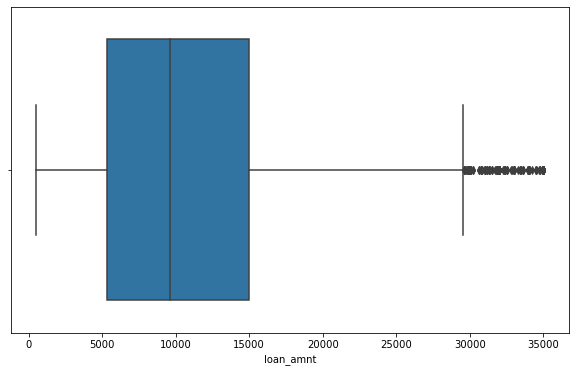

--------------Box Plot Category addr_state  -----------------



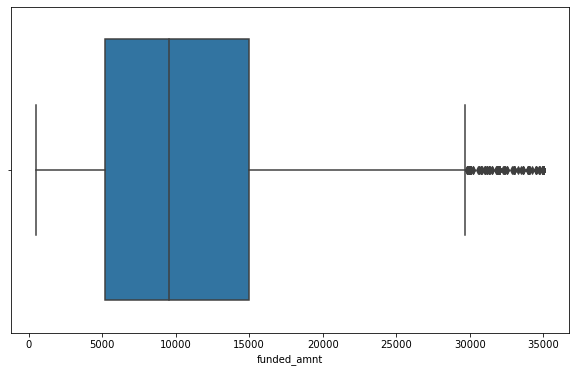

--------------Box Plot Category addr_state  -----------------



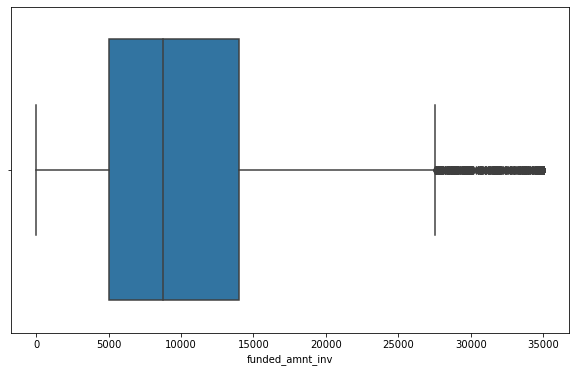

--------------Box Plot Category addr_state  -----------------



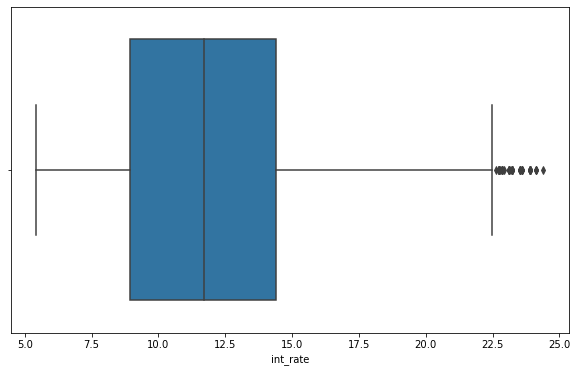

--------------Box Plot Category addr_state  -----------------



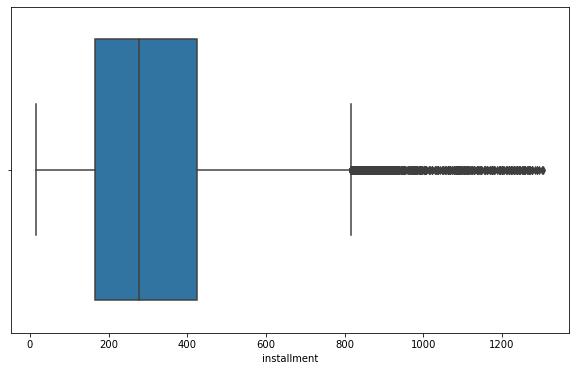

--------------Box Plot Category addr_state  -----------------



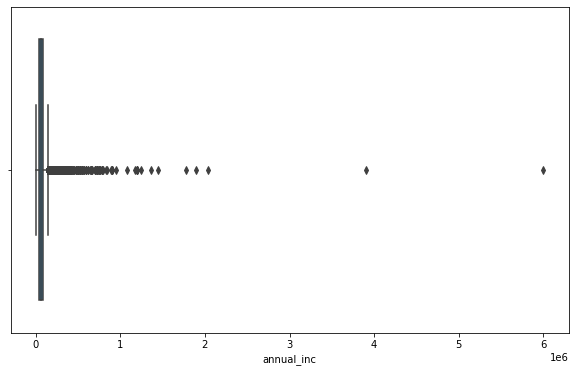

--------------Box Plot Category addr_state  -----------------



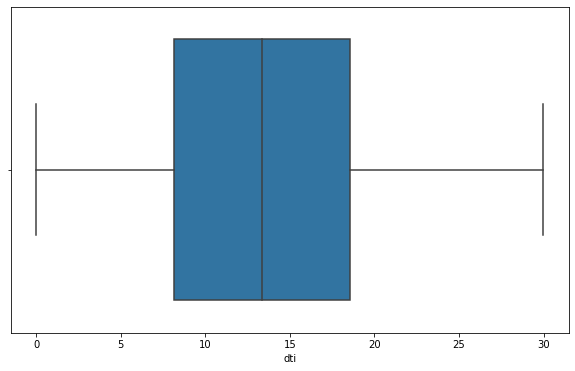

--------------Box Plot Category addr_state  -----------------



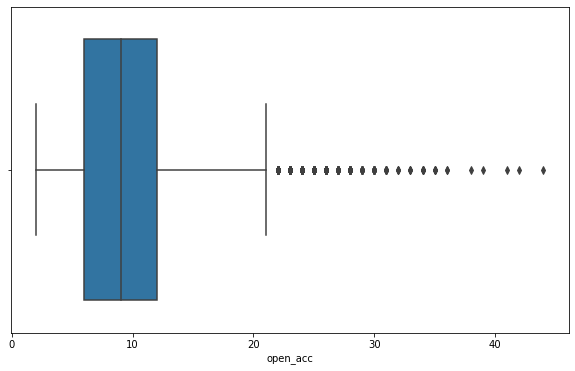

--------------Box Plot Category addr_state  -----------------



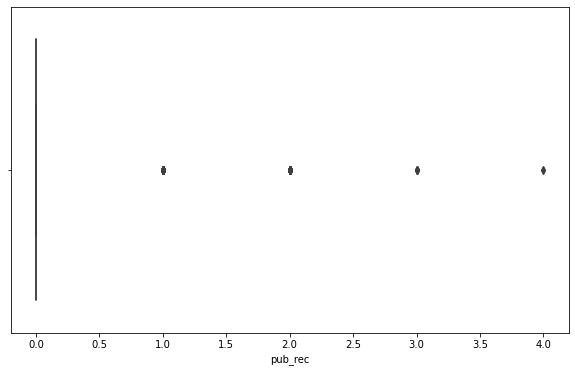

--------------Box Plot Category addr_state  -----------------



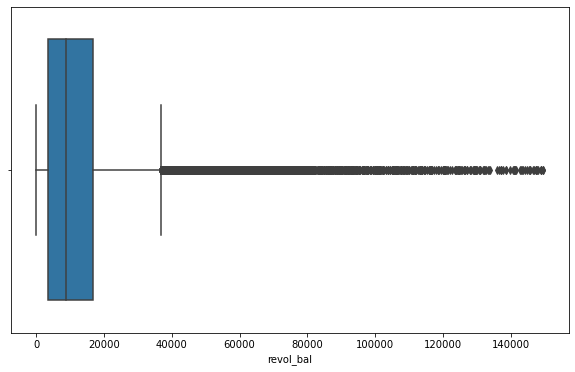

--------------Box Plot Category addr_state  -----------------



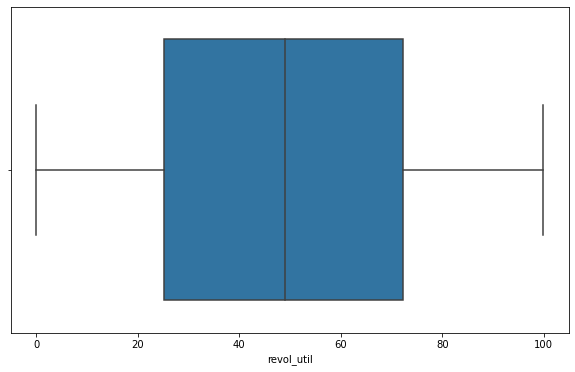

--------------Box Plot Category addr_state  -----------------



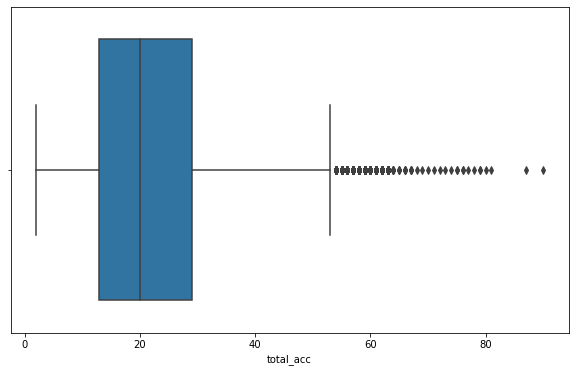

--------------Box Plot Category addr_state  -----------------



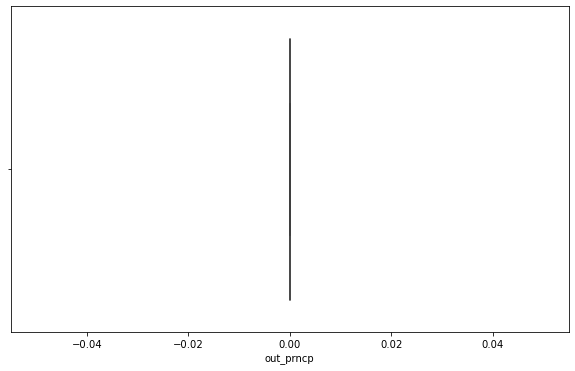

--------------Box Plot Category addr_state  -----------------



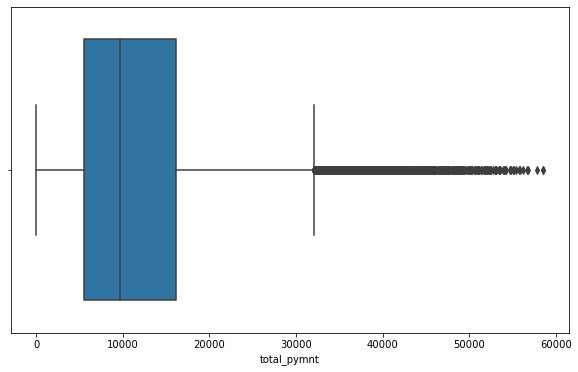

--------------Box Plot Category addr_state  -----------------



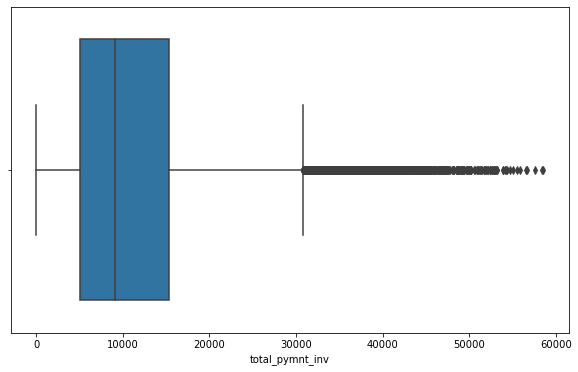

--------------Box Plot Category addr_state  -----------------



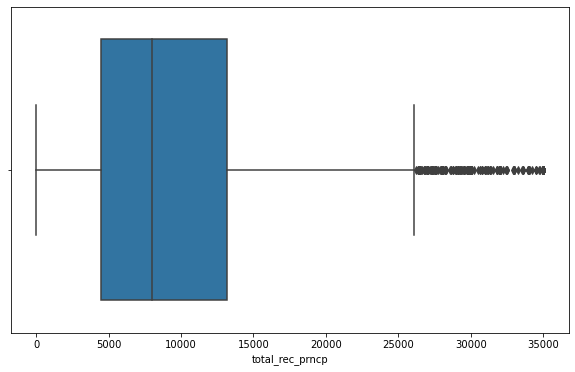

--------------Box Plot Category addr_state  -----------------



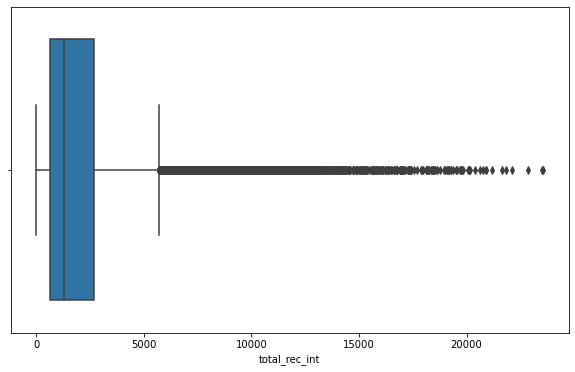

--------------Box Plot Category addr_state  -----------------



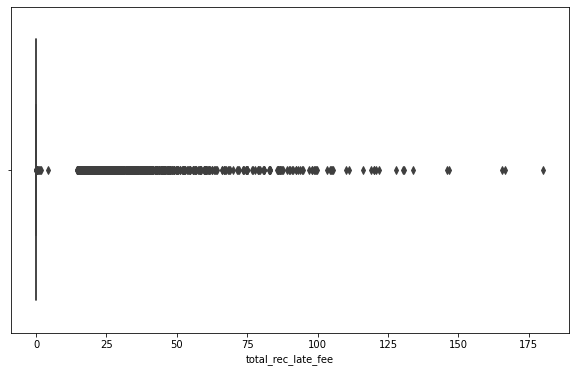

--------------Box Plot Category addr_state  -----------------



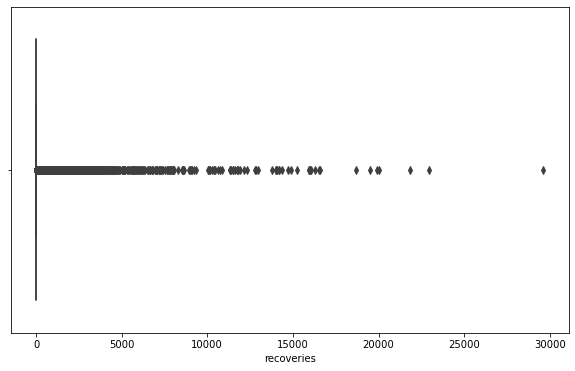

--------------Box Plot Category addr_state  -----------------



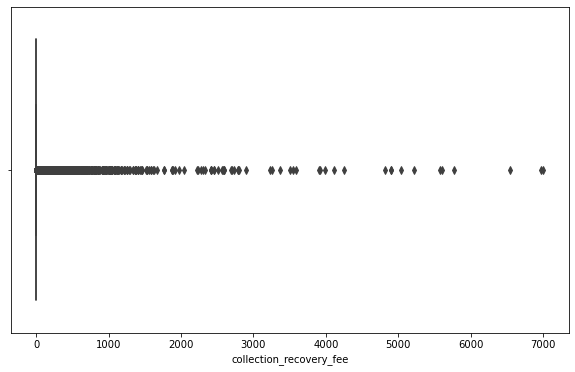

--------------Box Plot Category addr_state  -----------------



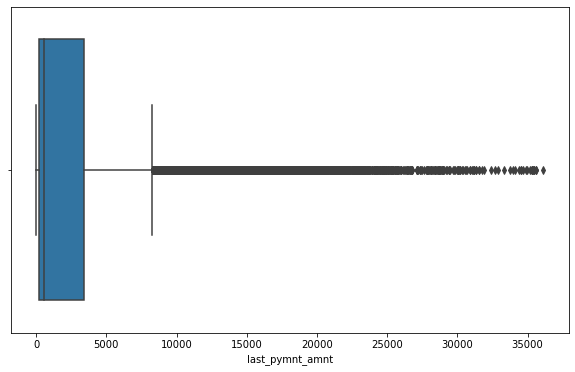

In [26]:
for var in measure_col:
    print("--------------Box Plot Category",z," -----------------")
    plt.figure(figsize=(10,6))
    print()
    sns.boxplot(data=loan_df_1,x=var)
    #plt.xticks(rotation=90)
    plt.show()
    
# 1. As per below there are some outliers in column collection_recovery_fee, recoveries, 
#    total_rec_late_fee,out_prncp, pub_rec, annual_inc

In [27]:
# I am taking annual_inc to remove outlier from 
lis=loan_df_1['annual_inc'].tolist()
mn=np.mean(lis)
sdd=np.std(lis)
li=[x for x in lis if (x > mn - 2 * sdd)]
li=[x for x in li if (x < mn + 2 * sdd)]
loan_df_2=loan_df_1[loan_df_1['annual_inc'].isin(li)]

In [28]:
# Comparing the previous and new dataframe
loan_df_1.shape , loan_df_2.shape

((38577, 44), (37880, 44))

--------------Box Plot Category addr_state  -----------------


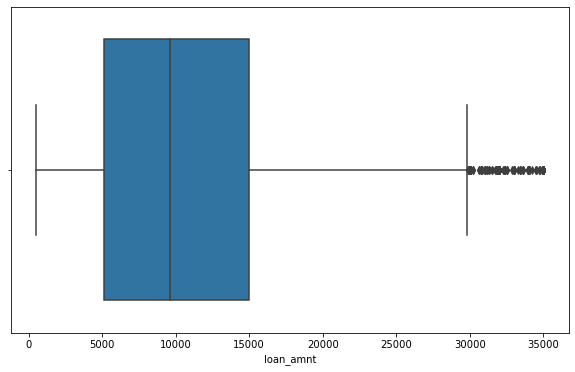

--------------Box Plot Category addr_state  -----------------


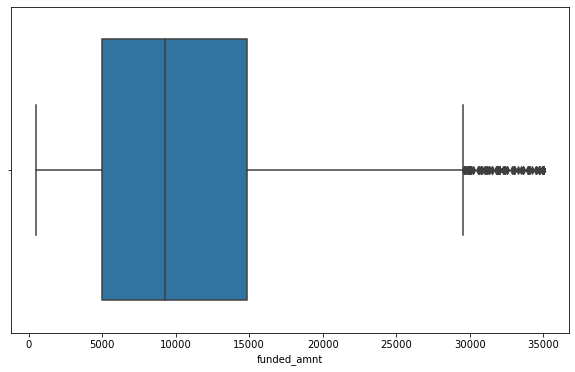

--------------Box Plot Category addr_state  -----------------


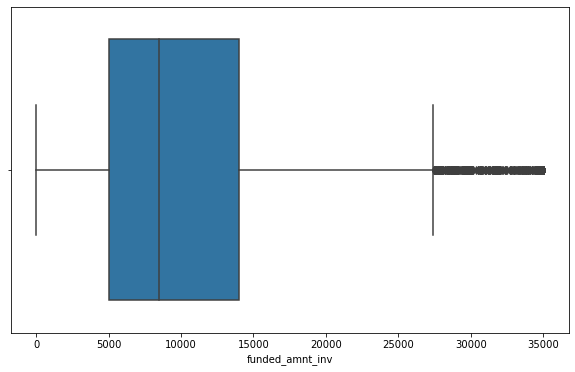

--------------Box Plot Category addr_state  -----------------


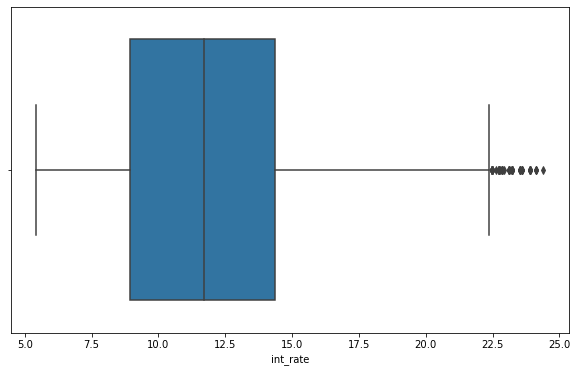

--------------Box Plot Category addr_state  -----------------


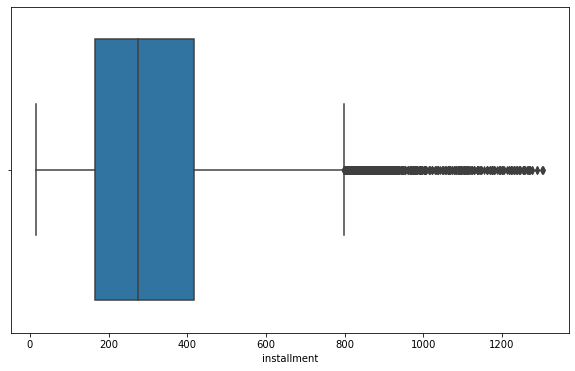

--------------Box Plot Category addr_state  -----------------


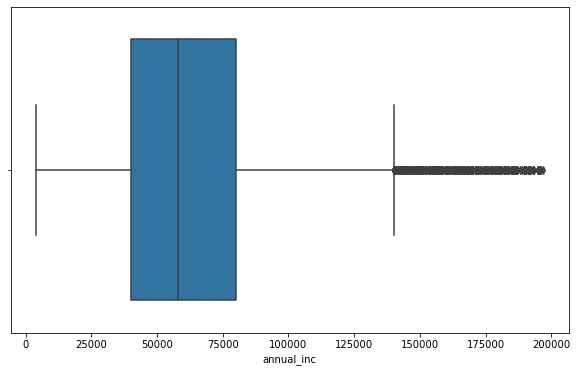

--------------Box Plot Category addr_state  -----------------


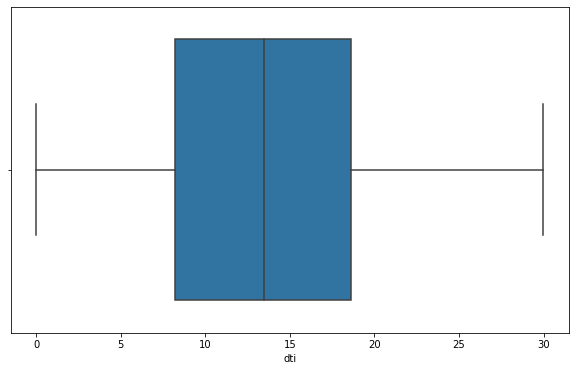

--------------Box Plot Category addr_state  -----------------


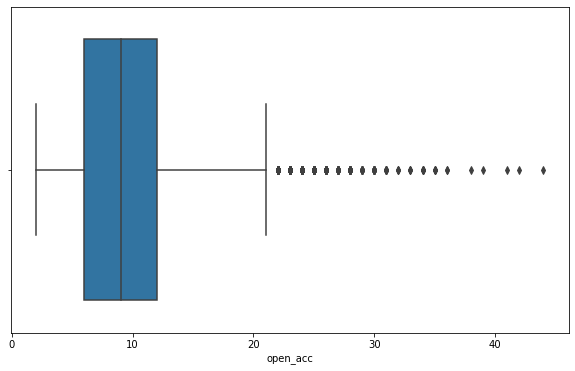

--------------Box Plot Category addr_state  -----------------


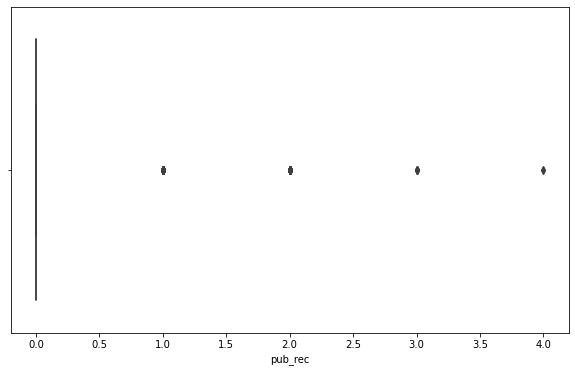

--------------Box Plot Category addr_state  -----------------


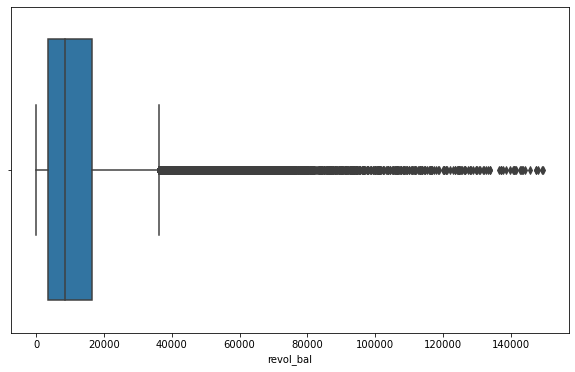

--------------Box Plot Category addr_state  -----------------


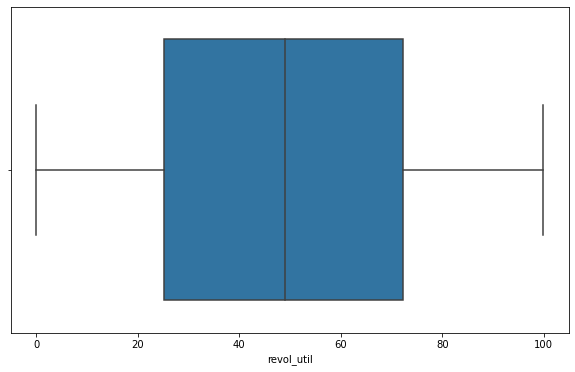

--------------Box Plot Category addr_state  -----------------


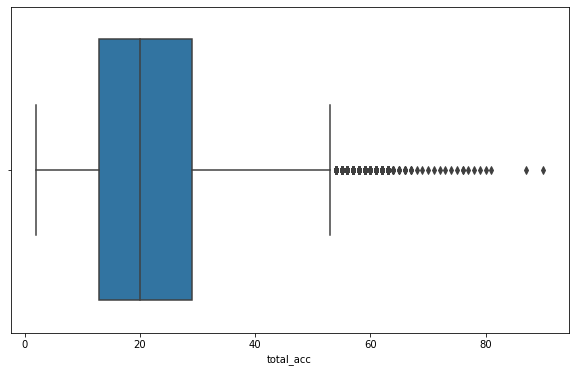

--------------Box Plot Category addr_state  -----------------


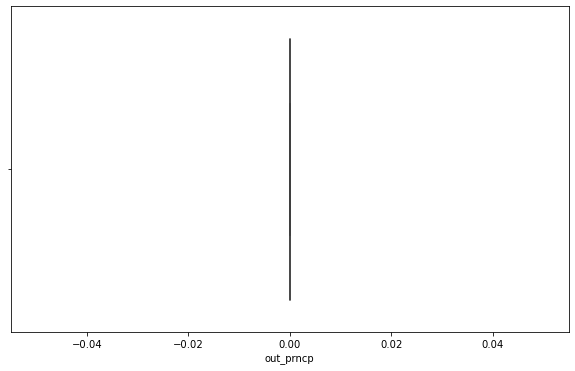

--------------Box Plot Category addr_state  -----------------


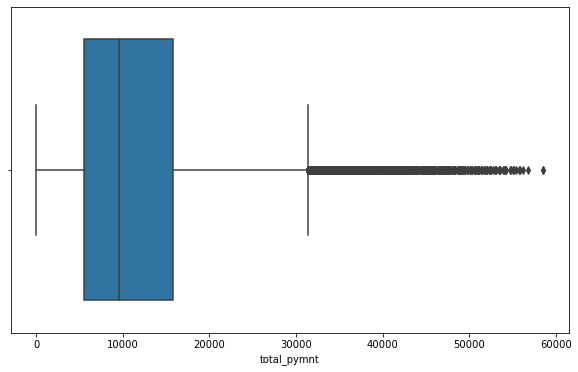

--------------Box Plot Category addr_state  -----------------


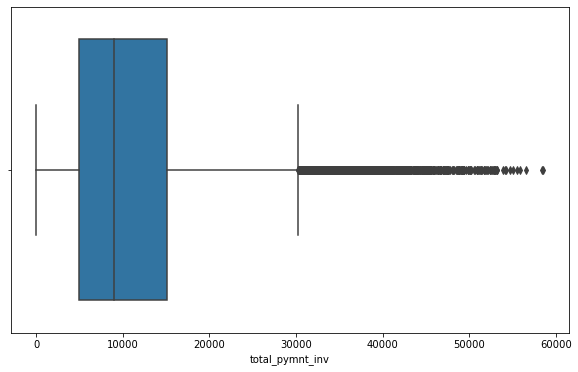

--------------Box Plot Category addr_state  -----------------


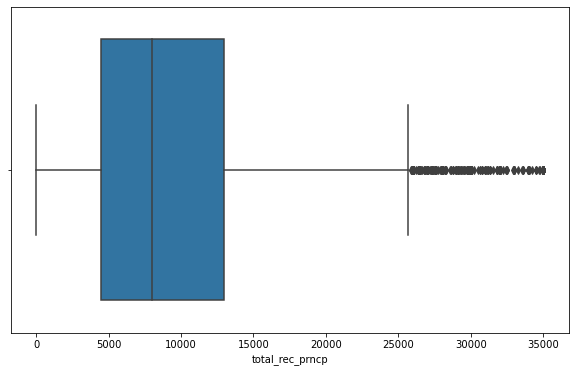

--------------Box Plot Category addr_state  -----------------


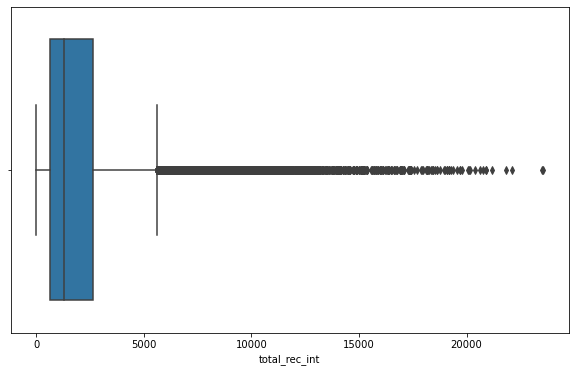

--------------Box Plot Category addr_state  -----------------


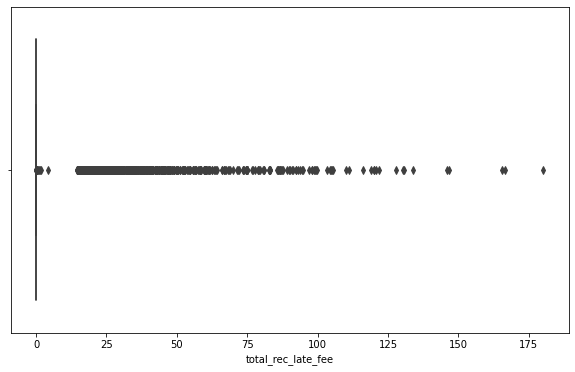

--------------Box Plot Category addr_state  -----------------


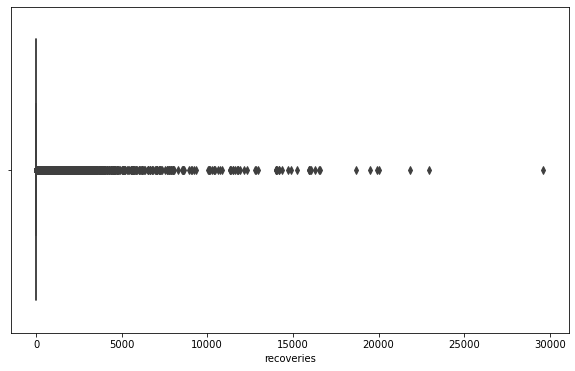

--------------Box Plot Category addr_state  -----------------


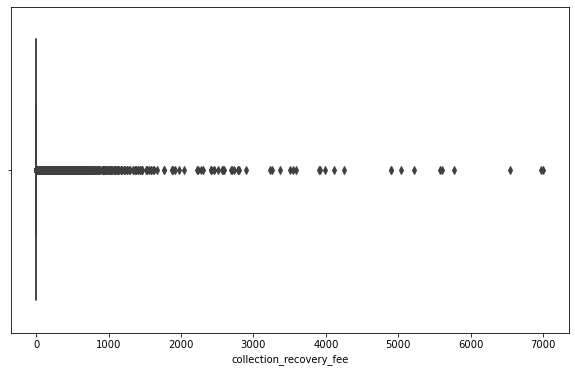

--------------Box Plot Category addr_state  -----------------


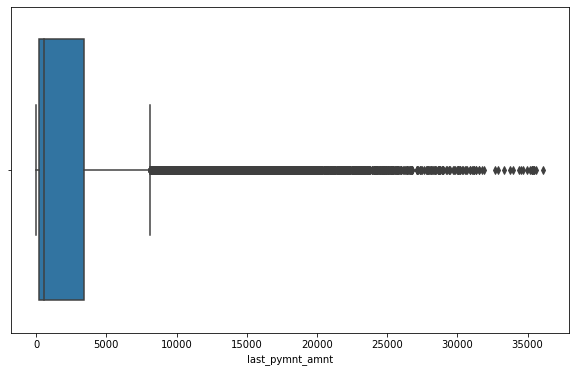

In [29]:
# Plotting the same value
for var in measure_col:
    print("--------------Box Plot Category",z," -----------------")
    plt.figure(figsize=(10,6))
    sns.boxplot(data=loan_df_2,x=var)
    #plt.xticks(rotation=90)
    plt.show()

In [30]:
loan_df_2.describe()

# Above box plot and below description of data after removing:
#  1. Most of the loan_amnt are between 5400 and 15000
#  2. Most of the int_rate are between 9.070 and 14.5


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,dti,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,37880.000,37880.000,37880.000,37880.000,37880.000,37880.000,37880.000,37880.000,37880.000,37880.000,...,37880.000,37880.000,37880.000,37880.000,37880.000,37880.000,37880.000,37880.000,37880.000,37204.000
mean,676467.184,842426.455,10901.668,10645.527,10091.672,11.910,318.149,64129.362,503.790,13.360,...,0.000,11694.136,11107.630,9511.232,2084.216,1.364,97.324,12.493,2696.772,0.044
std,209140.881,264307.377,7223.457,6969.356,6899.317,3.682,204.398,32748.251,329.563,6.659,...,0.000,8638.364,8528.181,6878.260,2340.848,7.293,694.930,148.532,4415.771,0.206
min,54734.000,74724.000,500.000,500.000,0.000,5.420,15.690,4000.000,7.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,512449.500,661559.750,5125.000,5000.000,5000.000,8.940,164.860,40000.000,200.000,8.240,...,0.000,5478.388,4972.867,4500.000,638.308,0.000,0.000,0.000,215.578,0.000
50%,656424.000,839300.500,9600.000,9250.000,8500.000,11.710,275.210,57834.420,450.000,13.470,...,0.000,9544.454,8957.240,8000.000,1283.900,0.000,0.000,0.000,558.870,0.000
75%,828615.250,1037013.000,15000.000,14825.000,13975.000,14.350,418.262,80000.000,852.000,18.630,...,0.000,15825.392,15100.368,13000.000,2628.062,0.000,0.000,0.000,3379.997,0.000
max,1077501.000,1314167.000,35000.000,35000.000,35000.000,24.400,1305.190,197004.000,999.000,29.990,...,0.000,58563.680,58563.680,35000.020,23563.680,180.200,29623.350,7002.190,36115.200,2.000


--------------Measure Category loan_amnt  -----------------


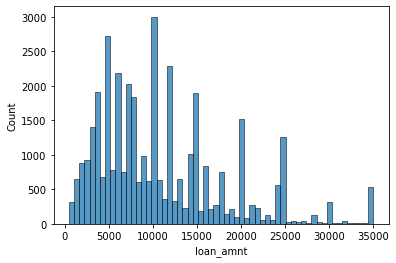

--------------Measure Category funded_amnt  -----------------


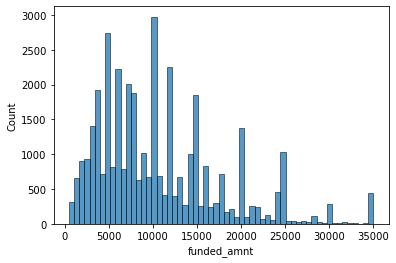

--------------Measure Category funded_amnt_inv  -----------------


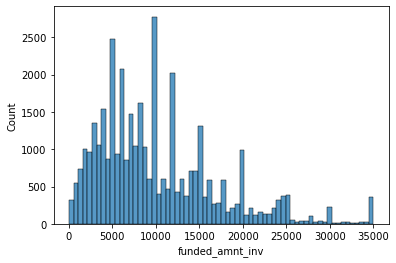

--------------Measure Category int_rate  -----------------


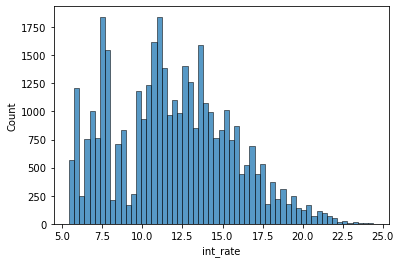

--------------Measure Category installment  -----------------


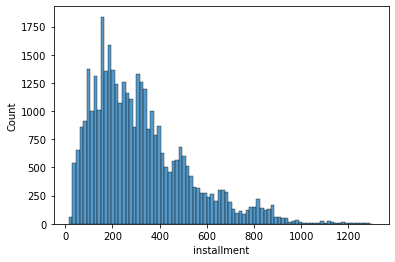

--------------Measure Category annual_inc  -----------------


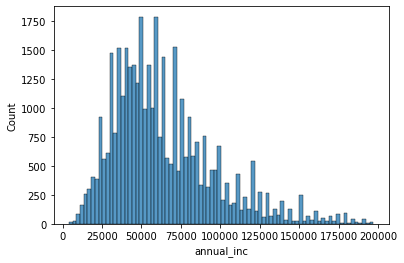

--------------Measure Category dti  -----------------


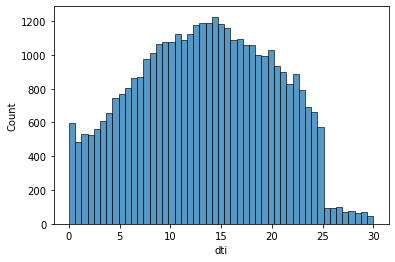

--------------Measure Category open_acc  -----------------


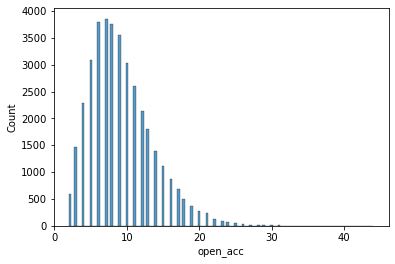

--------------Measure Category pub_rec  -----------------


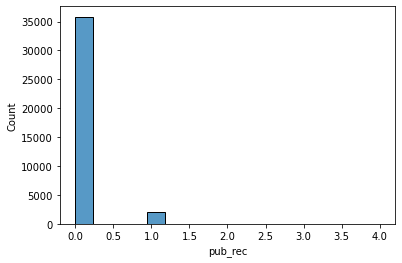

--------------Measure Category revol_bal  -----------------


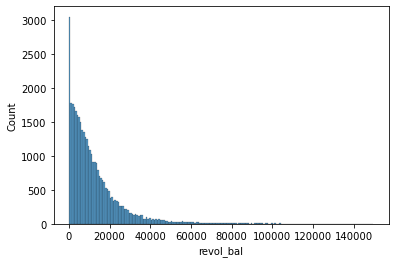

--------------Measure Category revol_util  -----------------


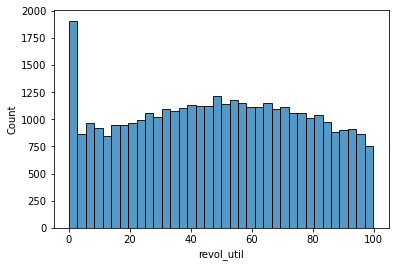

--------------Measure Category total_acc  -----------------


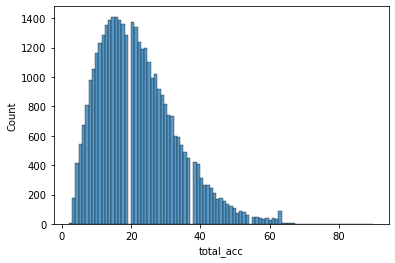

--------------Measure Category out_prncp  -----------------


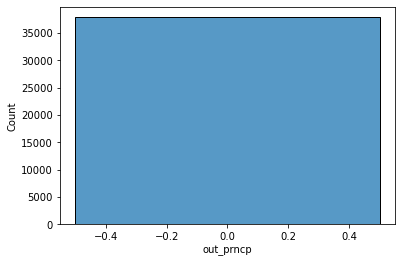

--------------Measure Category total_pymnt  -----------------


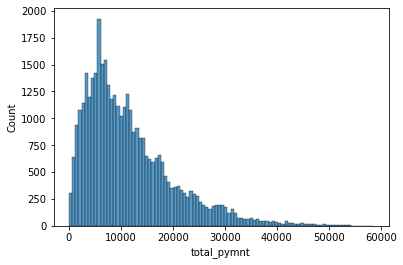

--------------Measure Category total_pymnt_inv  -----------------


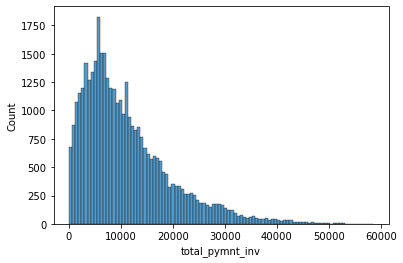

--------------Measure Category total_rec_prncp  -----------------


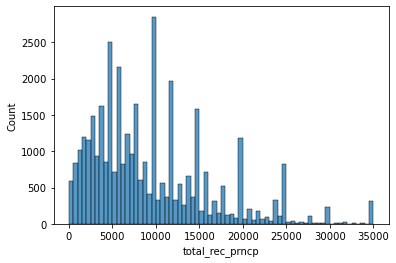

--------------Measure Category total_rec_int  -----------------


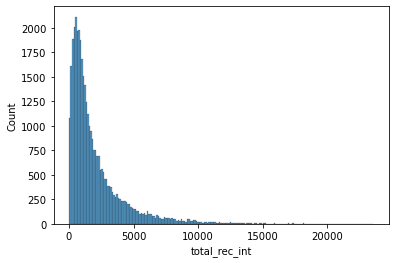

--------------Measure Category total_rec_late_fee  -----------------


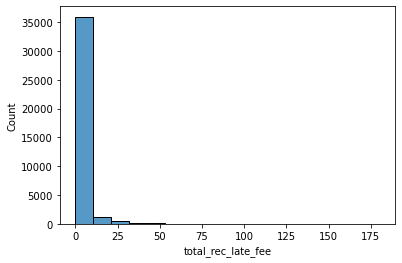

--------------Measure Category recoveries  -----------------


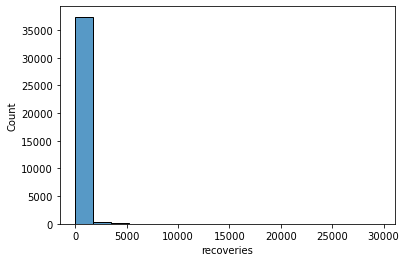

--------------Measure Category collection_recovery_fee  -----------------


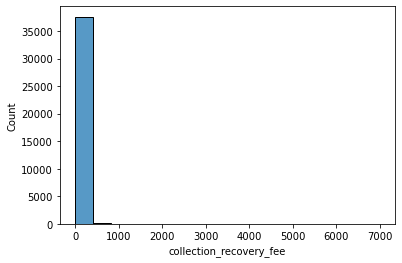

--------------Measure Category last_pymnt_amnt  -----------------


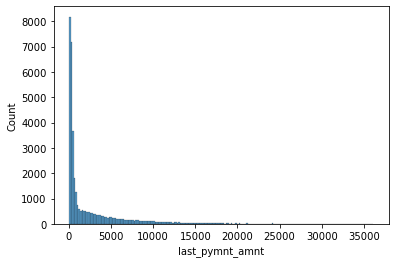

In [31]:
# Plotting histplot for more insights
# The below give same insights which we can see above in numbers
# 1. Most of the loan_amnt and funded_amnt lies between 5400 and 15000
# 2. int_rate lies between 9% and 14.5%
# 3. Annual income of borrowers lies between 40000 and 80000

for z in measure_col:
    print("--------------Measure Category",z," -----------------")
    sns.histplot(loan_df_2[z])
    plt.show()

In [32]:
# There are some numeric columns I belive if we can create categories
loan_df_2['cat_loan_amnt'] = pd.cut(x=loan_df_2['loan_amnt'], bins=[0, 10000, 20000, 30000, 40000], labels=['0-10K', '10K-20K', '20K-30K','30K-40K'])
loan_df_2['cat_annual_inc'] = pd.cut(x=loan_df_2['annual_inc'], bins=[0,20000, 40000, 60000, 80000,7000000], labels=['0-20K', '20K-40K', '40K-60K','60K-80K','>80K'])
loan_df_2['cat_int_rate']=pd.cut(x=loan_df_2['int_rate'],bins=[0,3,6,9,12,15,25],labels=['0-3%','3%-6%','6%-9%','9%-12%','12%-15%','>15%'])
##Create numerical column loan amount to annual income ratio
loan_df_2['lta']=loan_df_2['loan_amnt']/loan_df_2['annual_inc']
new_cat_list=['cat_loan_amnt','cat_annual_inc','cat_int_rate']

# Adding Newly derived Categorical columns to list
ordered_cat.extend(['cat_loan_amnt','cat_annual_inc','cat_int_rate'])
ordered_cat

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'issue_d',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'last_pymnt_d',
 'last_credit_pull_d',
 'pub_rec_bankruptcies',
 'cat_loan_amnt',
 'cat_annual_inc',
 'cat_int_rate']

--------------loan status vs  loan_amnt  -----------------


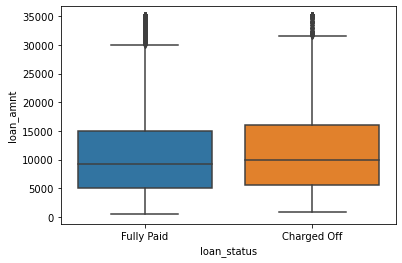

--------------loan status vs  funded_amnt  -----------------


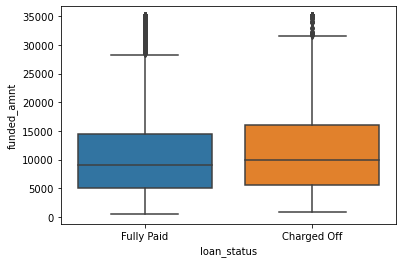

--------------loan status vs  funded_amnt_inv  -----------------


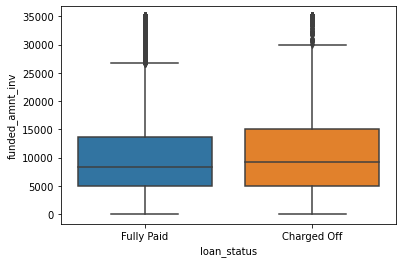

--------------loan status vs  int_rate  -----------------


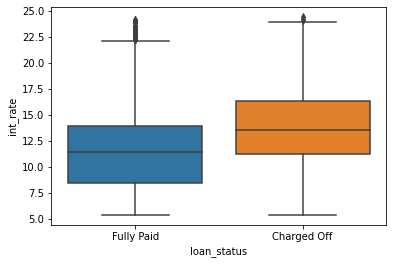

--------------loan status vs  installment  -----------------


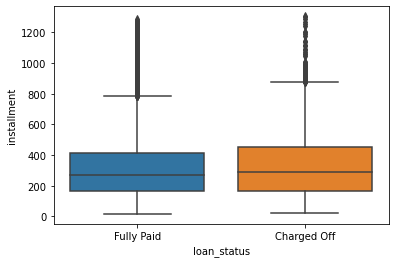

--------------loan status vs  annual_inc  -----------------


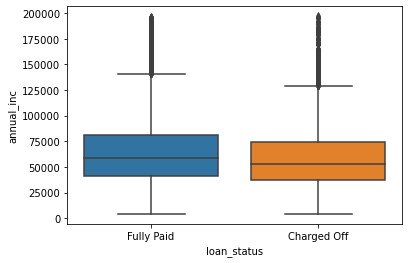

--------------loan status vs  dti  -----------------


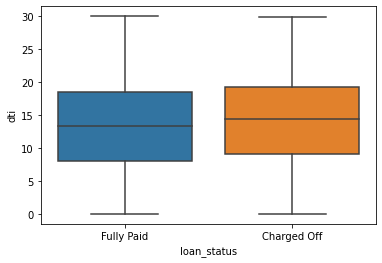

--------------loan status vs  open_acc  -----------------


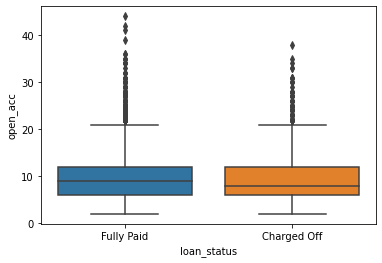

--------------loan status vs  pub_rec  -----------------


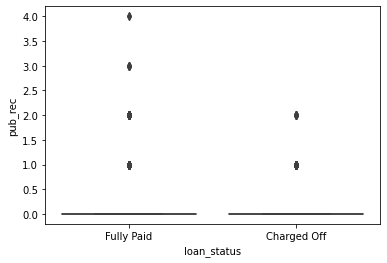

--------------loan status vs  revol_bal  -----------------


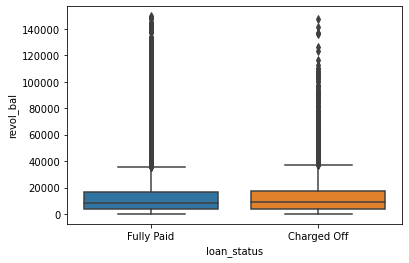

--------------loan status vs  revol_util  -----------------


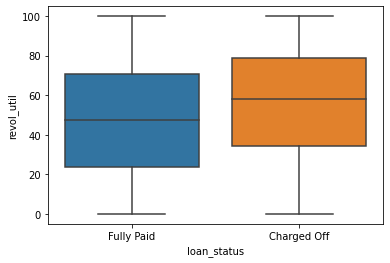

--------------loan status vs  total_acc  -----------------


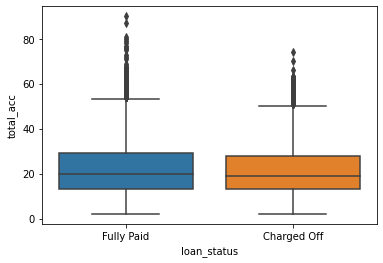

--------------loan status vs  out_prncp  -----------------


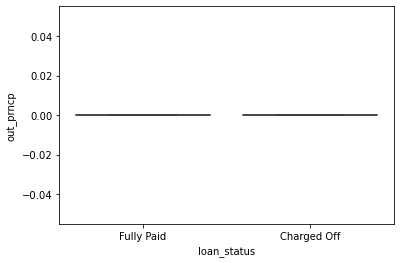

--------------loan status vs  total_pymnt  -----------------


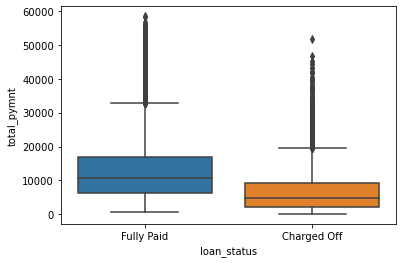

--------------loan status vs  total_pymnt_inv  -----------------


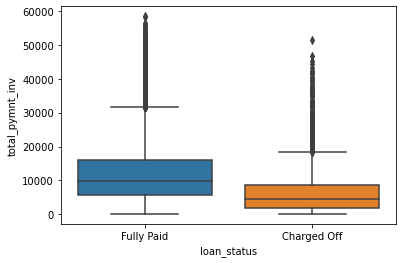

--------------loan status vs  total_rec_prncp  -----------------


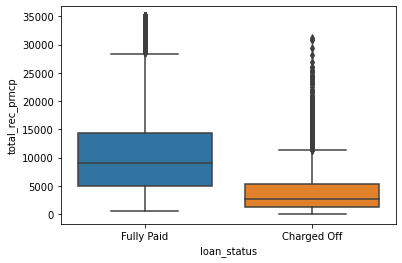

--------------loan status vs  total_rec_int  -----------------


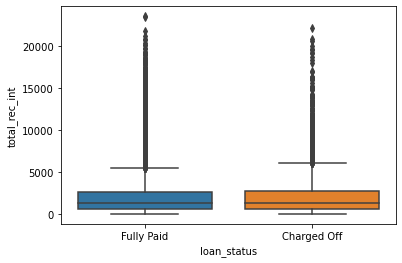

--------------loan status vs  total_rec_late_fee  -----------------


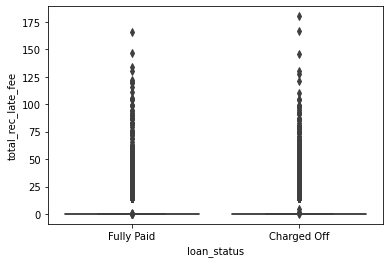

--------------loan status vs  recoveries  -----------------


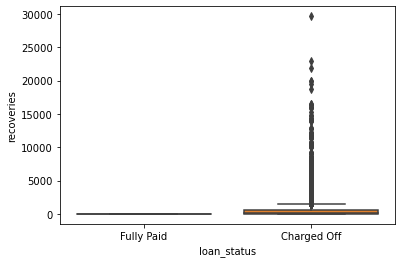

--------------loan status vs  collection_recovery_fee  -----------------


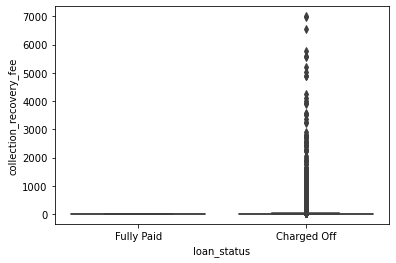

--------------loan status vs  last_pymnt_amnt  -----------------


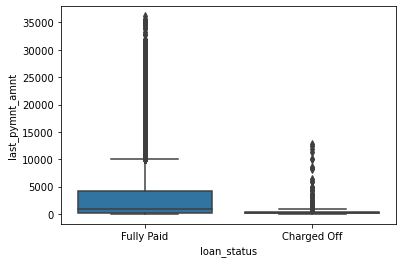

In [33]:
for i in measure_col:
    print("--------------loan status vs ",i," -----------------")
    sns.boxplot(x=loan_df_2['loan_status'],y=loan_df_2[i])
    plt.show()

--------------loan status vs  loan_amnt  -----------------


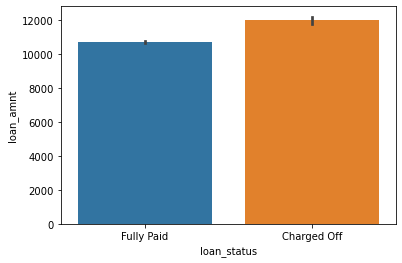

--------------loan status vs  funded_amnt  -----------------


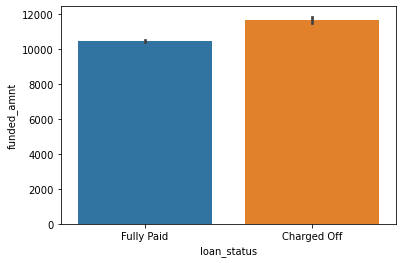

--------------loan status vs  funded_amnt_inv  -----------------


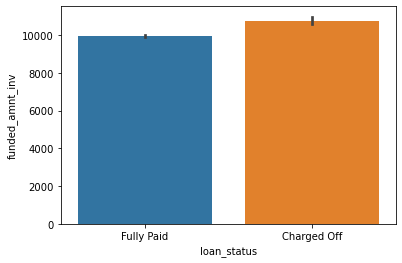

--------------loan status vs  int_rate  -----------------


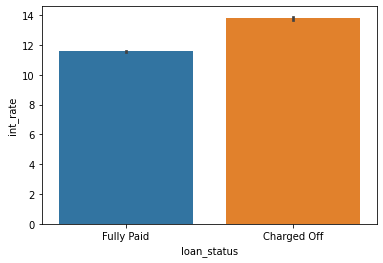

--------------loan status vs  installment  -----------------


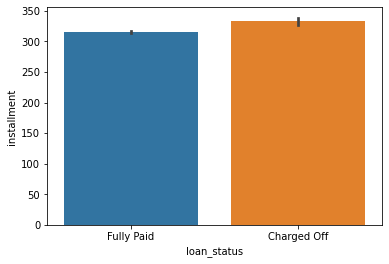

--------------loan status vs  annual_inc  -----------------


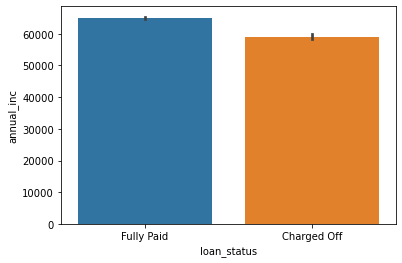

--------------loan status vs  dti  -----------------


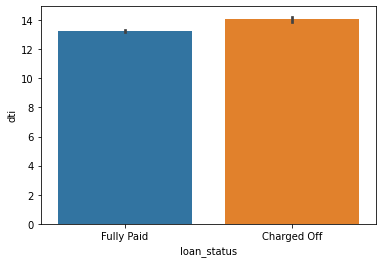

--------------loan status vs  open_acc  -----------------


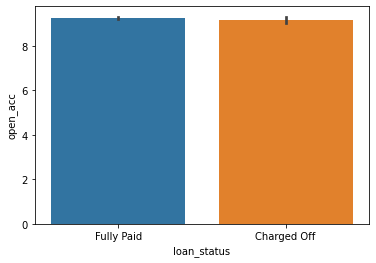

--------------loan status vs  pub_rec  -----------------


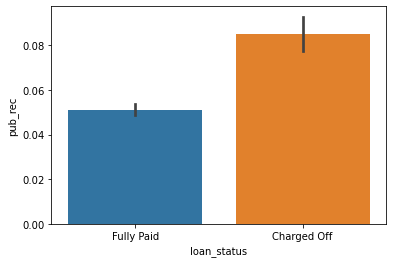

--------------loan status vs  revol_bal  -----------------


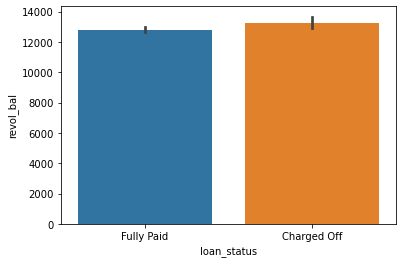

--------------loan status vs  revol_util  -----------------


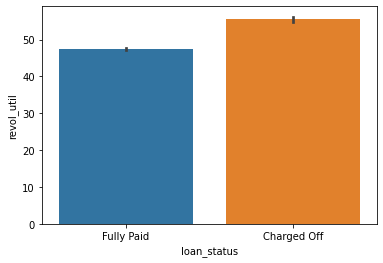

--------------loan status vs  total_acc  -----------------


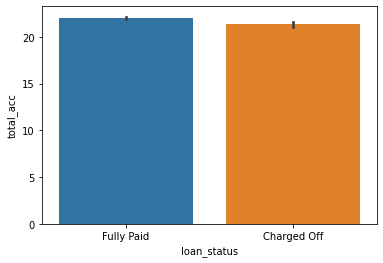

--------------loan status vs  out_prncp  -----------------


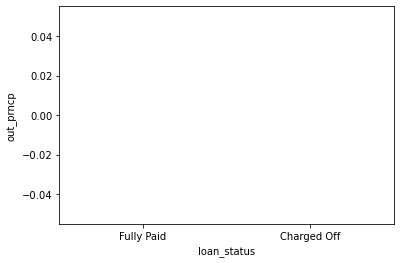

--------------loan status vs  total_pymnt  -----------------


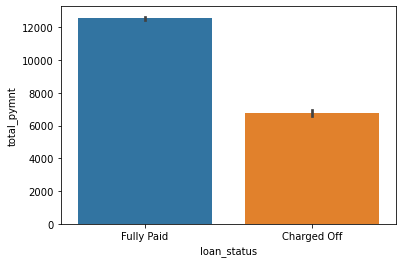

--------------loan status vs  total_pymnt_inv  -----------------


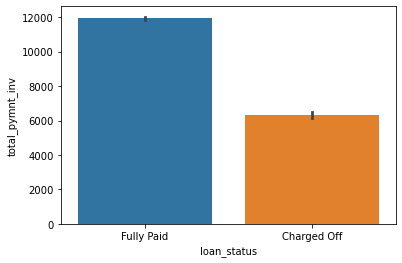

--------------loan status vs  total_rec_prncp  -----------------


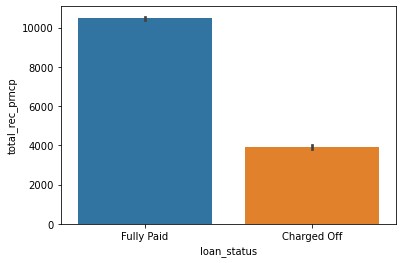

--------------loan status vs  total_rec_int  -----------------


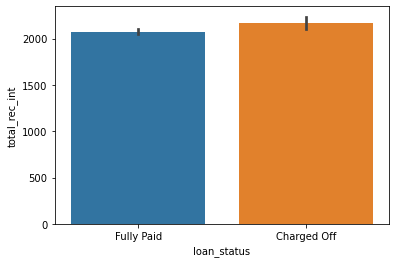

--------------loan status vs  total_rec_late_fee  -----------------


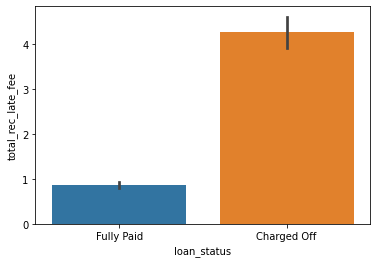

--------------loan status vs  recoveries  -----------------


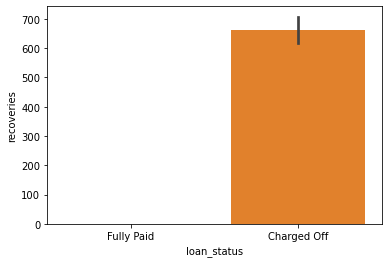

--------------loan status vs  collection_recovery_fee  -----------------


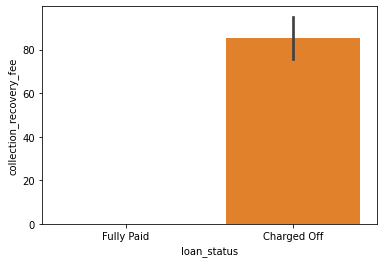

--------------loan status vs  last_pymnt_amnt  -----------------


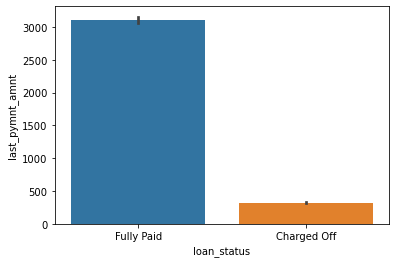

In [34]:
#numerical vs categorical
for i in measure_col:
    print("--------------loan status vs ",i," -----------------")
    sns.barplot(x=loan_df_2['loan_status'],y=loan_df_2[i])
    plt.show()

--------------New Category cat_loan_amnt  -----------------


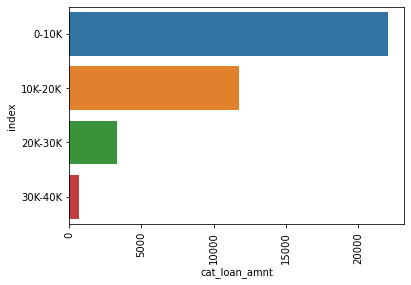

--------------New Category cat_annual_inc  -----------------


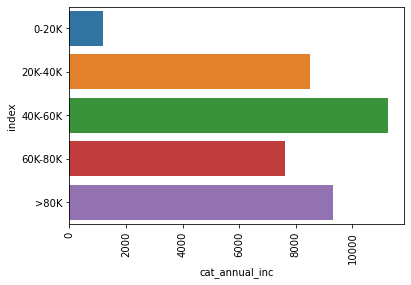

--------------New Category cat_int_rate  -----------------


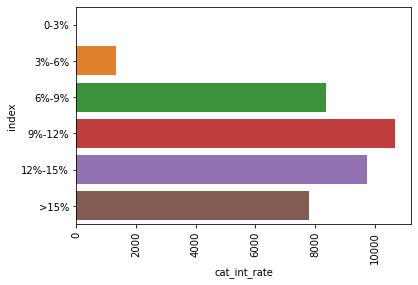

In [35]:
# Plotting the graph
for z in new_cat_list:
    print("--------------New Category",z," -----------------")
    dta=loan_df_2[z].value_counts().head(15).reset_index()
    sns.barplot(y='index',x=z,data=dta)
    plt.xticks(rotation=90)
    plt.show()

# Segmentation Analysis

### 1. Creating segmentation on the basis of loan status and plotting the graph

--------------Segmentation of Ordered Category term  -----------------


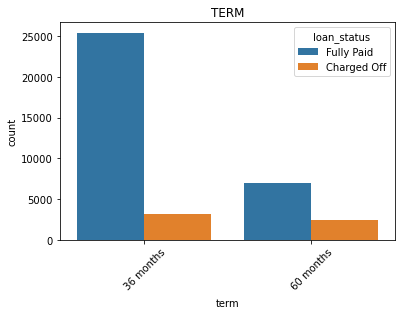

--------------Segmentation of Ordered Category grade  -----------------


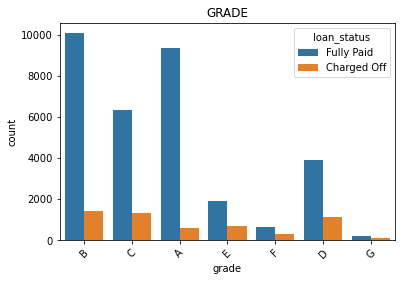

--------------Segmentation of Ordered Category sub_grade  -----------------


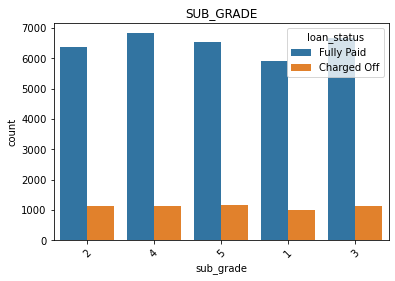

--------------Segmentation of Ordered Category emp_length  -----------------


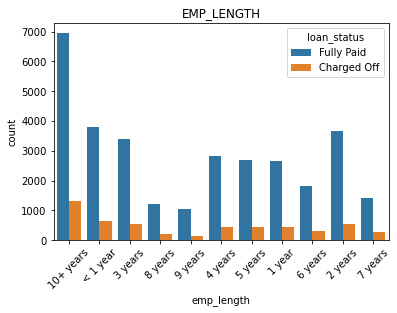

--------------Segmentation of Ordered Category issue_d  -----------------


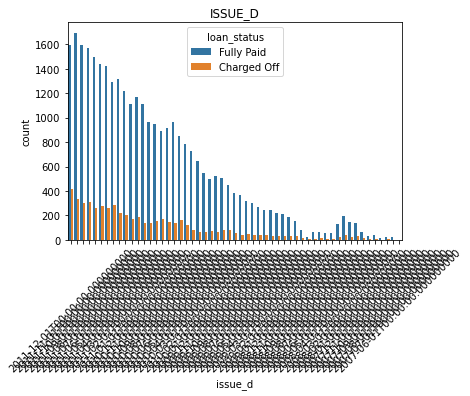

--------------Segmentation of Ordered Category delinq_2yrs  -----------------


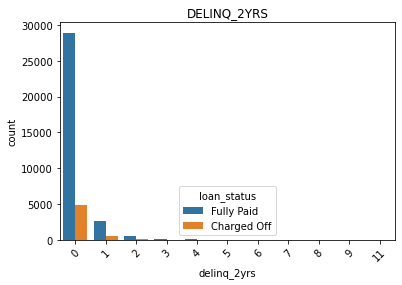

--------------Segmentation of Ordered Category earliest_cr_line  -----------------


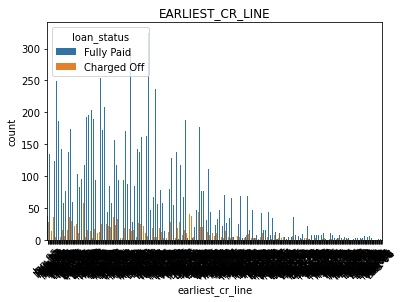

--------------Segmentation of Ordered Category inq_last_6mths  -----------------


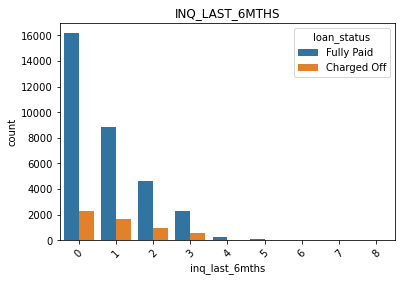

--------------Segmentation of Ordered Category mths_since_last_delinq  -----------------


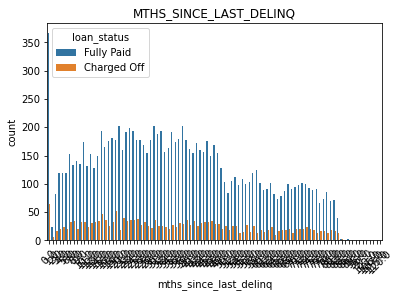

--------------Segmentation of Ordered Category last_pymnt_d  -----------------


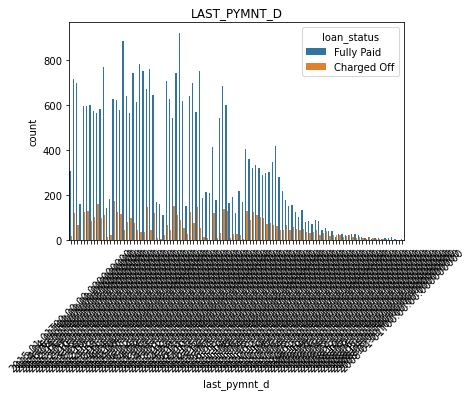

--------------Segmentation of Ordered Category last_credit_pull_d  -----------------


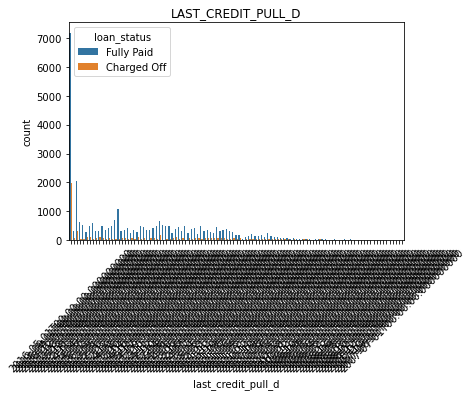

--------------Segmentation of Ordered Category pub_rec_bankruptcies  -----------------


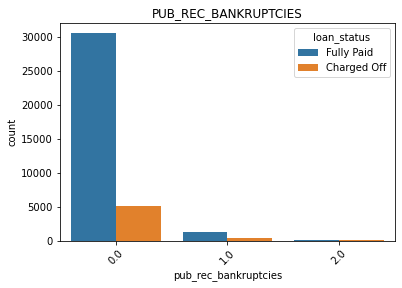

--------------Segmentation of Ordered Category cat_loan_amnt  -----------------


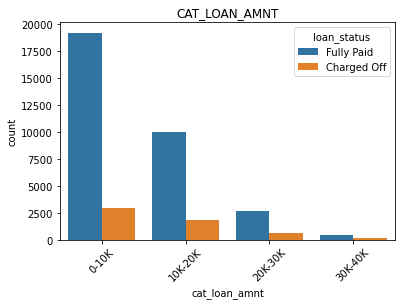

--------------Segmentation of Ordered Category cat_annual_inc  -----------------


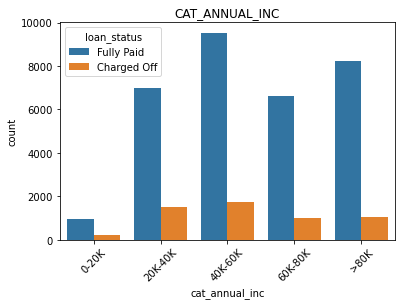

--------------Segmentation of Ordered Category cat_int_rate  -----------------


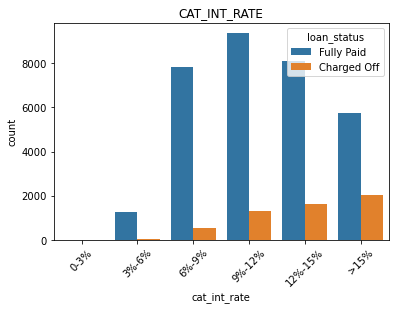

In [36]:
# Segmented on the basis of 'loan_status' and checking for each category
for z in ordered_cat:
    print("--------------Segmentation of Ordered Category",z," -----------------")
    sns.countplot(data=loan_df_2,hue='loan_status',x=z)
    plt.title(z.upper())
    plt.xticks(rotation=45)
    plt.show()

*  In Above chart we see that people who have fully paid as status they prefer to have 36 month as * * term
*  In GRADE most of the fully paid status falls into B, C and A grades while most of the defaulters * are in B, C and D grade
*  People who have EMP_LENGTH 10+ Years tends to apply more than any other category
   i. Most of the defaulter in EMP_LENGTH are 10+ years or <3 Years

--------------Segmentation of unordered Category home_ownership  -----------------


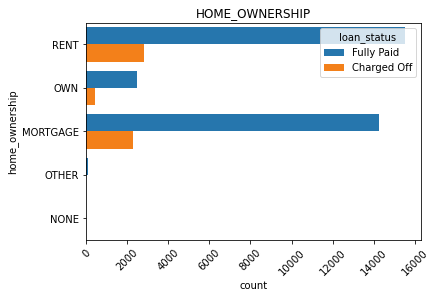

--------------Segmentation of unordered Category verification_status  -----------------


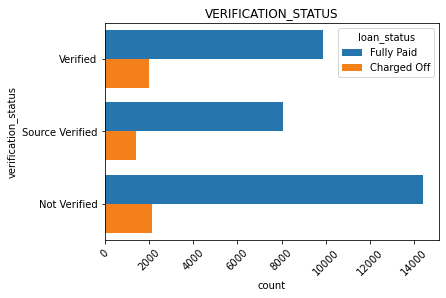

--------------Segmentation of unordered Category loan_status  -----------------


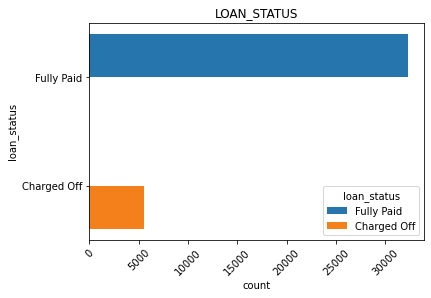

--------------Segmentation of unordered Category purpose  -----------------


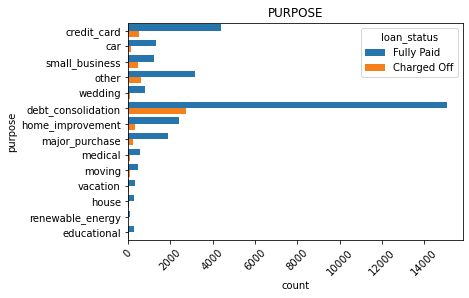

--------------Segmentation of unordered Category zip_code  -----------------


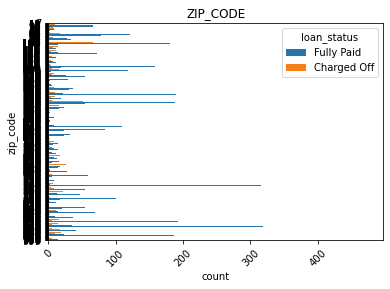

--------------Segmentation of unordered Category addr_state  -----------------


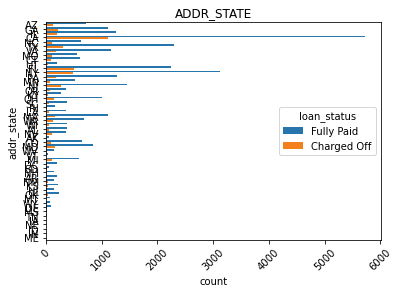

In [37]:
# Segmented on the basis of 'loan_status' and checking for unorder categorical variable
for z in unordered_cat:
    print("--------------Segmentation of unordered Category",z," -----------------")
    sns.countplot(data=loan_df_2,hue='loan_status',y=z,saturation=0.9,)
    plt.title(z.upper())
    plt.xticks(rotation=45)
    plt.show()

As per the above graph we get the below analysis:
* HOME_OWNERSHIP : Defaulters and Fully paid customers are either rented or have mortgage their property
* VERIFICATION_STATUS: Defaulters are almost same in numbers 
* More numbers of defaulter and fully paid people 

# Segmented Bivariate Analysis

--------------Segmentation of Bivariate Analysis:  term - loan_amnt  -----------------


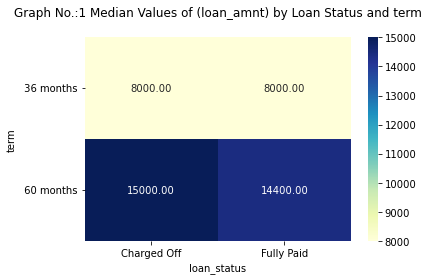

--------------Segmentation of Bivariate Analysis:  term - funded_amnt  -----------------


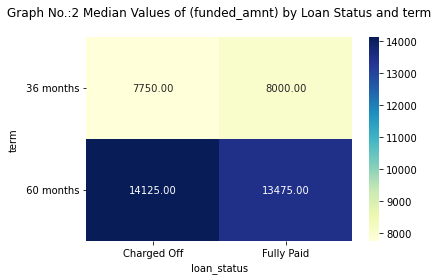

--------------Segmentation of Bivariate Analysis:  term - int_rate  -----------------


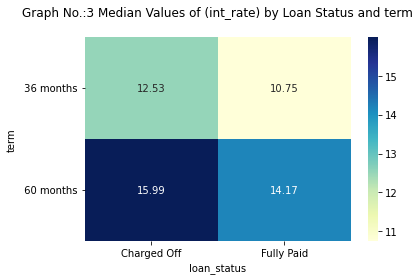

--------------Segmentation of Bivariate Analysis:  term - installment  -----------------


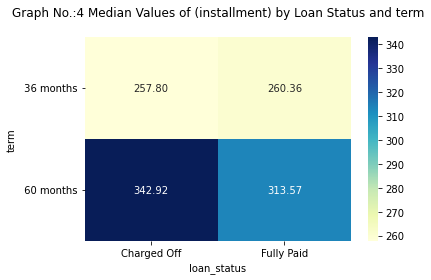

--------------Segmentation of Bivariate Analysis:  term - annual_inc  -----------------


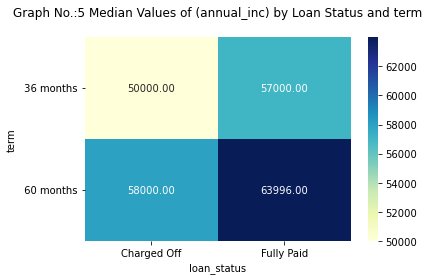

--------------Segmentation of Bivariate Analysis:  grade - loan_amnt  -----------------


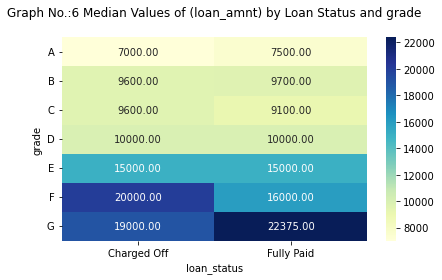

--------------Segmentation of Bivariate Analysis:  grade - funded_amnt  -----------------


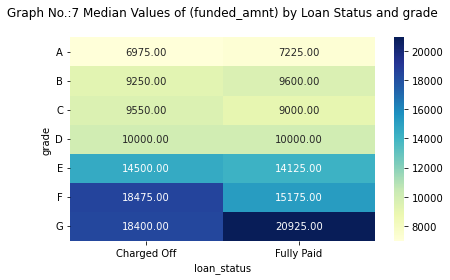

--------------Segmentation of Bivariate Analysis:  grade - int_rate  -----------------


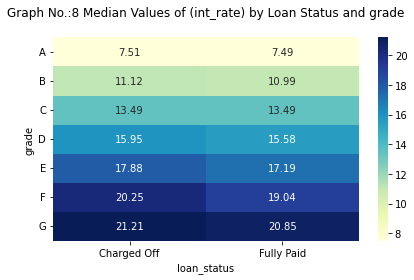

--------------Segmentation of Bivariate Analysis:  grade - installment  -----------------


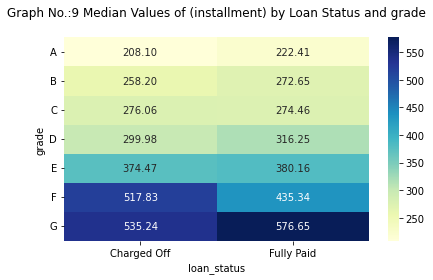

--------------Segmentation of Bivariate Analysis:  grade - annual_inc  -----------------


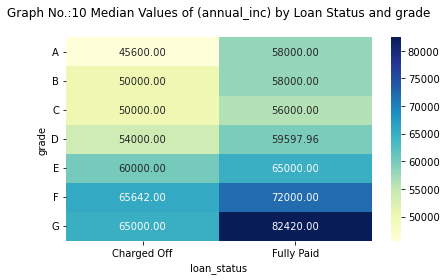

--------------Segmentation of Bivariate Analysis:  emp_length - loan_amnt  -----------------


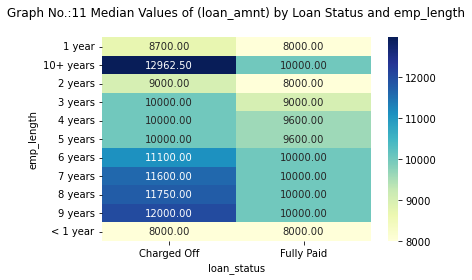

--------------Segmentation of Bivariate Analysis:  emp_length - funded_amnt  -----------------


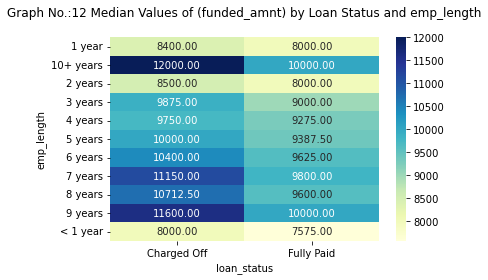

--------------Segmentation of Bivariate Analysis:  emp_length - int_rate  -----------------


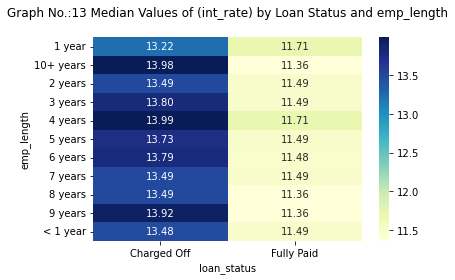

--------------Segmentation of Bivariate Analysis:  emp_length - installment  -----------------


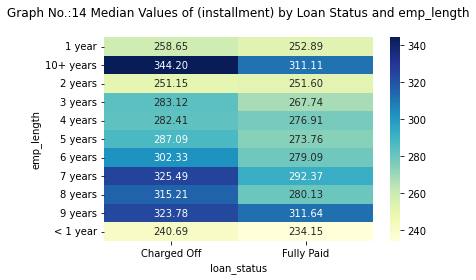

--------------Segmentation of Bivariate Analysis:  emp_length - annual_inc  -----------------


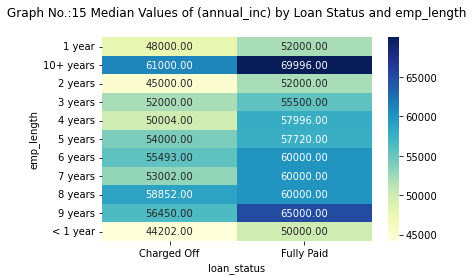

--------------Segmentation of Bivariate Analysis:  home_ownership - loan_amnt  -----------------


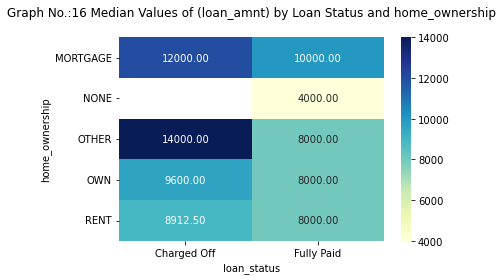

--------------Segmentation of Bivariate Analysis:  home_ownership - funded_amnt  -----------------


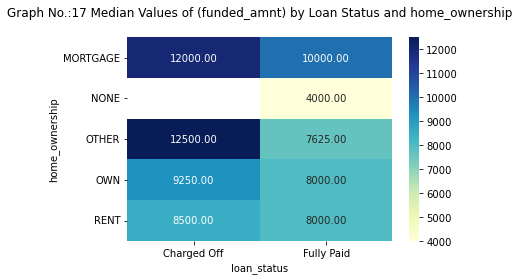

--------------Segmentation of Bivariate Analysis:  home_ownership - int_rate  -----------------


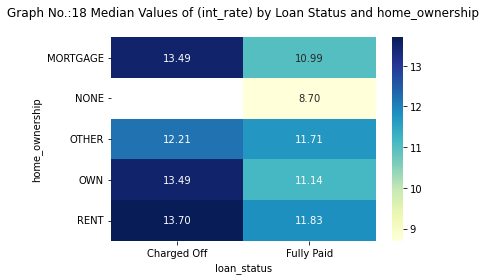

--------------Segmentation of Bivariate Analysis:  home_ownership - installment  -----------------


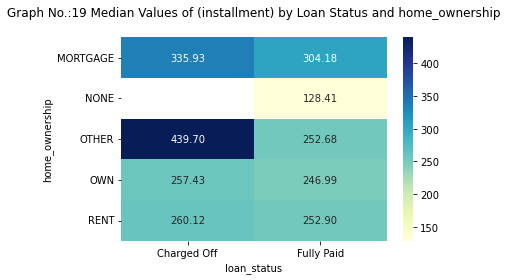

--------------Segmentation of Bivariate Analysis:  home_ownership - annual_inc  -----------------


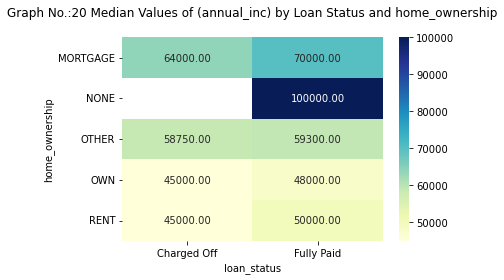

--------------Segmentation of Bivariate Analysis:  verification_status - loan_amnt  -----------------


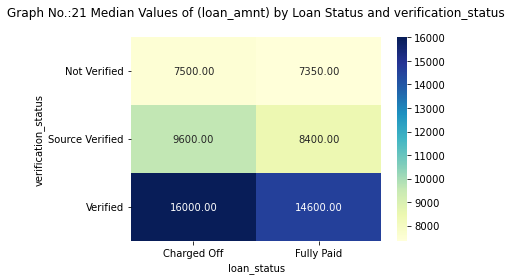

--------------Segmentation of Bivariate Analysis:  verification_status - funded_amnt  -----------------


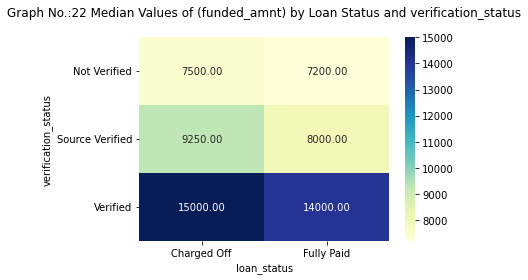

--------------Segmentation of Bivariate Analysis:  verification_status - int_rate  -----------------


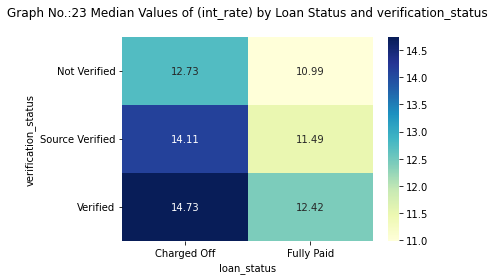

--------------Segmentation of Bivariate Analysis:  verification_status - installment  -----------------


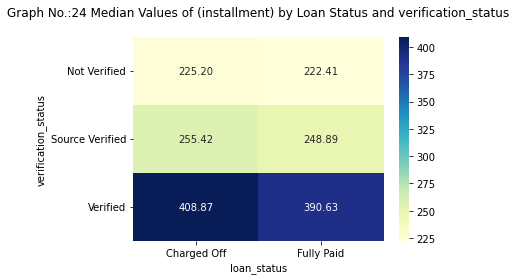

--------------Segmentation of Bivariate Analysis:  verification_status - annual_inc  -----------------


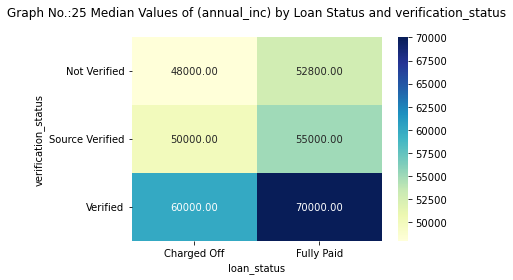

--------------Segmentation of Bivariate Analysis:  purpose - loan_amnt  -----------------


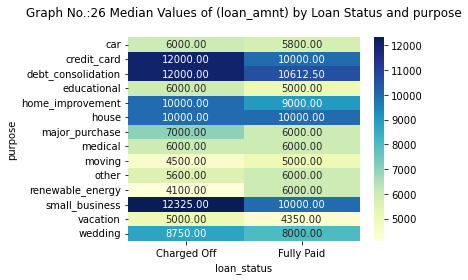

--------------Segmentation of Bivariate Analysis:  purpose - funded_amnt  -----------------


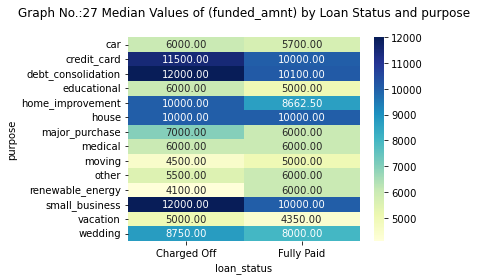

--------------Segmentation of Bivariate Analysis:  purpose - int_rate  -----------------


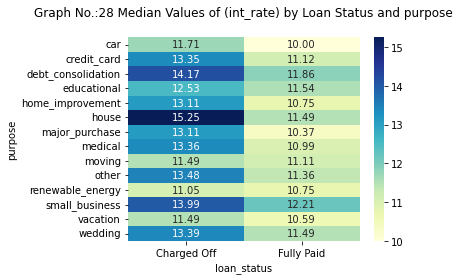

--------------Segmentation of Bivariate Analysis:  purpose - installment  -----------------


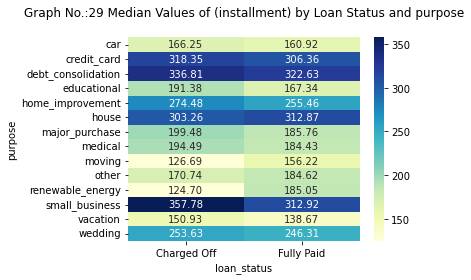

--------------Segmentation of Bivariate Analysis:  purpose - annual_inc  -----------------


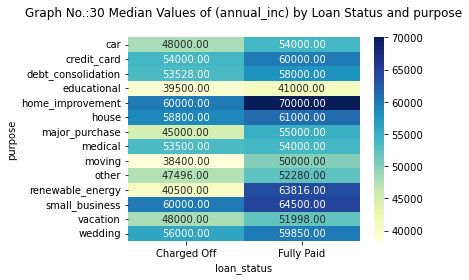

In [38]:
# I have checked for the value of each column and seggrigated them as below 
cat=['term','grade','emp_length','home_ownership','verification_status','purpose']
mes=['loan_amnt', 'funded_amnt','int_rate',
             'installment','annual_inc']
ct=1
for z in cat:
    for zx in mes:
        print("--------------Segmentation of Bivariate Analysis: ",z,'-',zx," -----------------")
        sns.heatmap(loan_df_2.pivot_table(columns=['loan_status'],index=[z],
                                  aggfunc='median',
                                  values=zx),
                    cmap='YlGnBu', annot=True, fmt=".2f")
        plt.title(f'Graph No.:{ct} Median Values of ({zx}) by Loan Status and {z}\n')
        plt.yticks(rotation=0)
        ct=ct+1
        plt.tight_layout()  
        plt.show()


# Insights in the above Graphs:
* Graph No. 1: Median loan amounts are almost the same between fully paid and charged-off customers.
* Graph No. 3: Median values of interest rates are higher for charged-off individuals who have applied for a 60-month term.
* Graph No. 4: Median installment values.
* Graph No. 6: For fully paid, Grade G has a greater median compared to any other category. Grade F tends to have a higher median loan amount in Charged off and Current status.
* Graph No. 8: Grades E, F, and G tend to accept loans at high interest rates.
* Graph No. 11: It seems that employees with more than 9 years of experience have a higher median compared to any other in charged off. Also, the current status shows that...
* Graph No. 13: Fully paid individuals have almost the same median throughout, the same goes for Charged off and Current.
* Graph No. 14: In charged off and fully paid loan status types, individuals with 9+ years of experience tend to have a higher number of median installments.
* Graph No. 15: Fully paid people's annual income tends to be higher than Charged off people's.
* Graph No. 16: Median values of loan amounts are high in the case of OTHER and MORTGAGE for charged off. Also, MORTGAGE individuals tend to have more loan amounts in Fully paid and Current categories.
* Graph No. 19: Median value of installments is higher in the case of home_ownership-Other in the charged-off category.
* Graph No. 26: Among loans categorized as "Charged Off" in loan status, the purposes of credit_card, debt_consolidation, and small business exhibit high median approved loan amounts.

# Multivariate Analysis

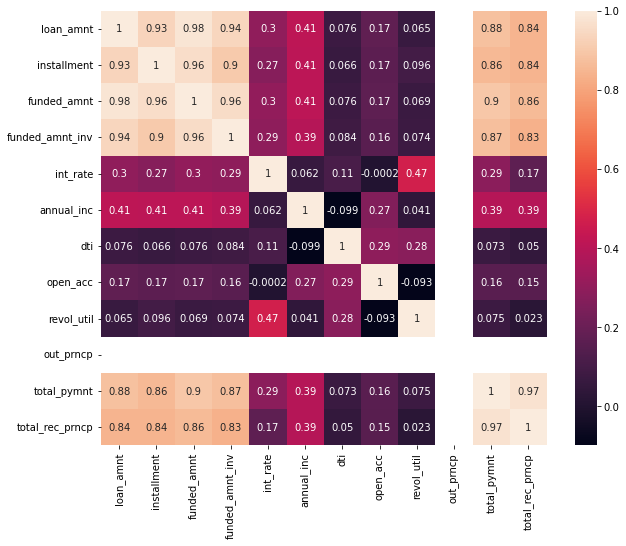

In [39]:
mult_measure=['loan_amnt','installment','funded_amnt','funded_amnt_inv','int_rate'
             ,'annual_inc','dti','open_acc','revol_util','out_prncp','total_pymnt'
             ,'total_rec_prncp'
             ]
#Multivariate analysis
plt.figure(figsize=(10,8))
sns.heatmap(loan_df_2[mult_measure].corr(),annot=True)
plt.show()